# **Predicting Hospital Readmission Rates for Diabetic Patients**


# **Data Import**

In [1]:
# Importing packages
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

import scipy

In [2]:
# MODIFY THE LOCATION OF THE DATA HERE

answer = pd.read_csv("Data/combined.csv")

answer

Mounted at /content/drive


,SurveyID,Description
0,2014,mental health survey for 2014
1,2016,mental health survey for 2016
2,2017,mental health survey for 2017
3,2018,mental health survey for 2018
4,2019,mental health survey for 2019


In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
question

,questiontext,questionid
0,What is your age?,1
1,What is your gender?,2
2,What country do you live in?,3
3,"If you live in the United States, which state or territory do you live in?",4
4,Are you self-employed?,5
5,Do you have a family history of mental illness?,6
6,Have you ever sought treatment for a mental health disorder from a mental health professional?,7
7,How many employees does your company or organization have?,8
8,Is your employer primarily a tech company/organization?,9
9,Does your employer provide mental health benefits as part of healthcare coverage?,10


In [ ]:
answer

,AnswerText,SurveyID,UserID,QuestionID
0,37,2014,1,1
1,44,2014,2,1
2,32,2014,3,1
3,31,2014,4,1
4,31,2014,5,1
...,...,...,...,...
236893,Other,2016,2689,117
236894,Support,2016,2690,117
236895,Back-end Developer,2016,2691,117
236896,DevOps/SysAdmin,2016,2692,117


# **Data Transformation & Exploration**

**Data Visualisation**

In [3]:
# Create a table showing which QuestionIDs appear in which SurveyIDs
question_survey_table = answer.groupby(['SurveyID', 'QuestionID']).size().unstack(fill_value=0)

# Print the table
print(question_survey_table.to_string())

QuestionID   1     2     3     4     5     6     7     8     9     10    11    12    13    14    15    16    17    18    19    20    21    22    23    24    25    26    27    28    29    30    31    32    33    34    48    49    50    51    52    53    54    55    56   57   58   59   60   61   62   63   64   65   66   67   68   69   70   71   72   73   74   75   76   77   78   79   80   81   82   83   84   85   86   87   88   89    90    91    92    93    94    95    96    97    98    99    100   101   102   103   104   105   106   107   108   109   110   111   112   113   114   115   116   117   118
SurveyID                                                                                                                                                                                                                                                                                                                                                                                                

In [4]:
df = answer.pivot_table(index=['SurveyID', 'UserID'], columns='QuestionID', values='AnswerText', aggfunc='first')

# Reset the index if needed
df.reset_index(inplace=True)

df.columns

Index(['SurveyID',   'UserID',          1,          2,          3,          4,
                5,          6,          7,          8,
       ...
              109,        110,        111,        112,        113,        114,
              115,        116,        117,        118],
      dtype='object', name='QuestionID', length=107)

101


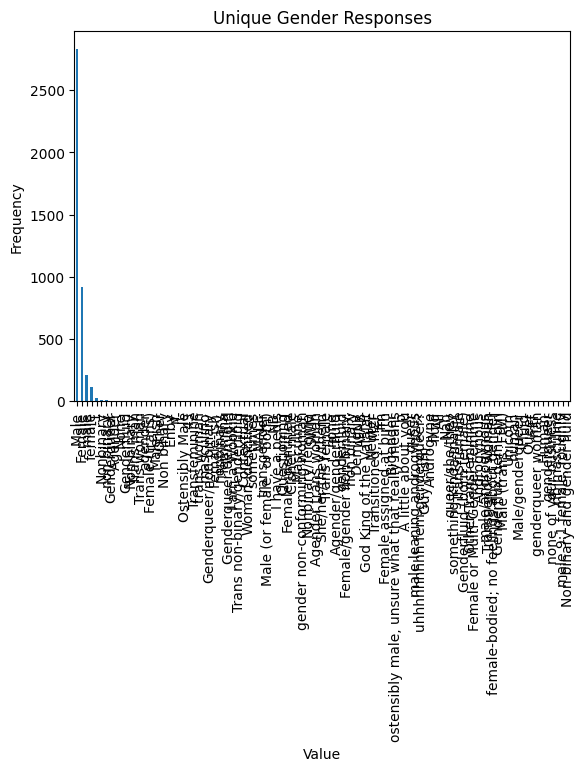

In [ ]:
genders = df[2]
print(len(set(genders)))
# Plot the frequency of each value
genders.value_counts().plot(kind='bar')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Unique Gender Responses')
plt.show()

In [ ]:
def categorize_gender(gender):
    if gender.lower() in ['Male', 'male', 'MALE']:
        return 'Male'
    elif gender.lower() in ['Female', 'female', 'Female-identified']:
        return 'Female'
    elif gender == '-1':
        return '-1'
    else:
        return 'Other'

# Apply the function to the '2' column
df[2] = df[2].apply(categorize_gender)

# Now the '2' column should have only 'Male', 'Female', or 'Other' values
print(df[2].unique())

['Female' 'Male' 'Other' '-1']


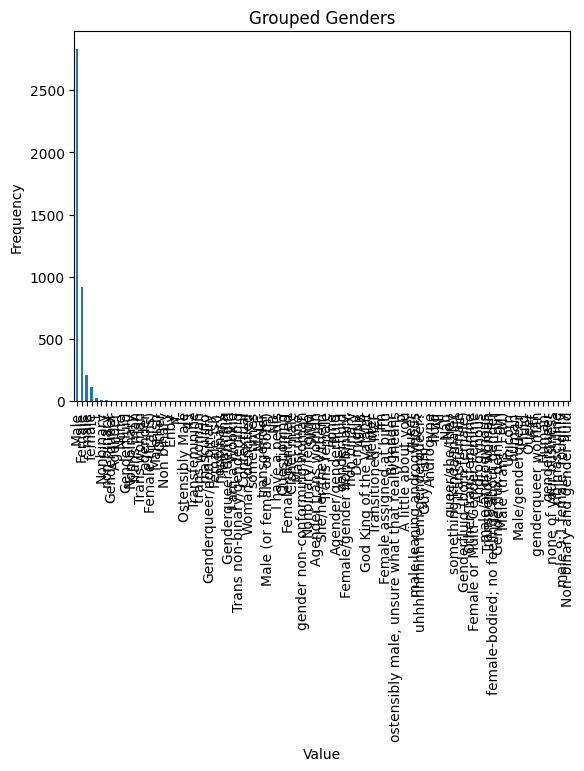

In [ ]:
genders = df[2]

# Plot the frequency of each value
genders.value_counts().plot(kind='bar')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Grouped Genders')
plt.show()

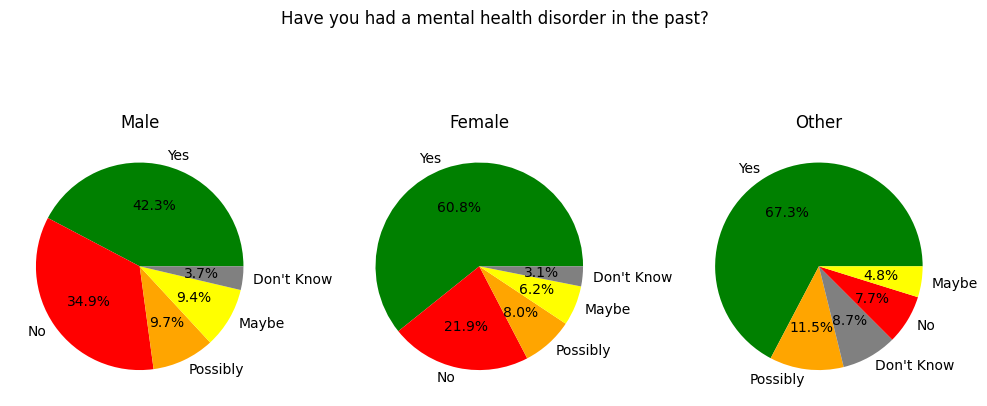

In [ ]:
df_male = df.loc[df[2].eq('Male')]
df_female = df.loc[df[2].eq('Female')]
df_other = df.loc[df[2].eq('Other')]
male_32 = df_male.loc[df_male[32] != '-1'][32].value_counts()
female_32 = df_female.loc[df_female[32] != '-1'][32].value_counts()
other_32 = df_other.loc[df_other[32] != '-1'][32].value_counts()

# Create a figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

colors = ['green', 'red', 'orange', 'yellow', 'gray']
# Plot the first pie chart
axs[0].pie(male_32, labels=male_32.index, autopct='%1.1f%%', colors = colors, startangle=0)
axs[0].set_title('Male')

# Plot the second pie chart
axs[1].pie(female_32, labels=female_32.index, autopct='%1.1f%%', colors = colors, startangle=0)
axs[1].set_title('Female')

# Plot the third pie chart
axs[2].pie(other_32, labels=other_32.index, autopct='%1.1f%%', colors = ['green', 'orange', 'gray', 'red', 'yellow'], startangle=0)
axs[2].set_title('Other')

# Adjust layout to fit the titles
plt.suptitle('Have you had a mental health disorder in the past?', fontsize=12)
plt.tight_layout()
# Show the plot
plt.show()

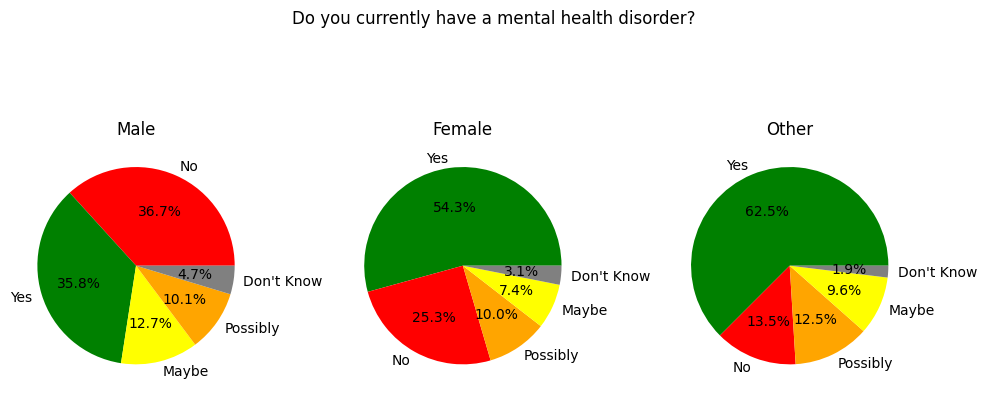

In [ ]:
df_male = df.loc[df[2].eq('Male')]
df_female = df.loc[df[2].eq('Female')]
df_other = df.loc[df[2].eq('Other')]
male_33 = df_male.loc[df_male[33] != '-1'][33].value_counts()
female_33 = df_female.loc[df_female[32] != '-1'][33].value_counts()
other_33 = df_other.loc[df_other[32] != '-1'][33].value_counts()

# Create a figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

colors = ['green', 'red', 'orange', 'yellow', 'gray']
# Plot the first pie chart
axs[0].pie(male_33, labels=male_33.index, autopct='%1.1f%%', colors = ['red', 'green', 'yellow', 'orange', 'gray'], startangle=0)
axs[0].set_title('Male')

# Plot the second pie chart
axs[1].pie(female_33, labels=female_33.index, autopct='%1.1f%%', colors = colors, startangle=0)
axs[1].set_title('Female')

# Plot the third pie chart
axs[2].pie(other_33, labels=other_33.index, autopct='%1.1f%%', colors = colors, startangle=0)
axs[2].set_title('Other')

# Adjust layout to fit the titles
plt.suptitle('Do you currently have a mental health disorder?', fontsize=12)
plt.tight_layout()
# Show the plot
plt.show()

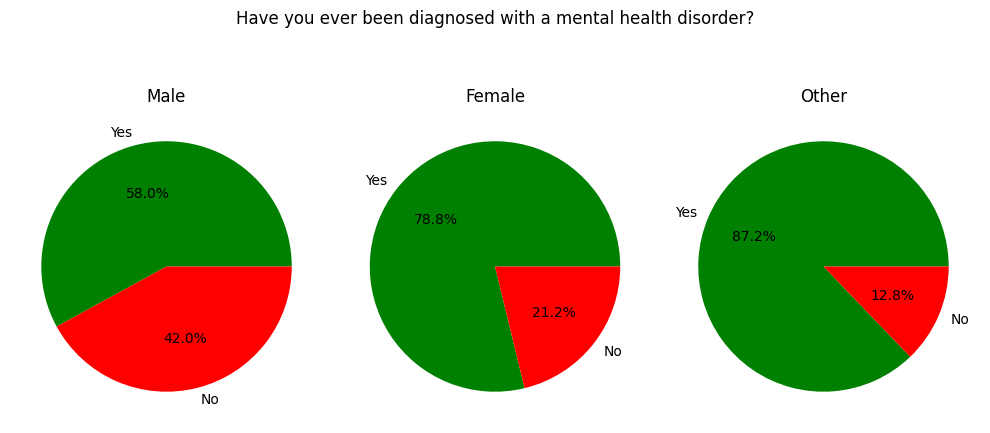

In [ ]:
df_male = df.loc[df[2].eq('Male')]
df_female = df.loc[df[2].eq('Female')]
df_other = df.loc[df[2].eq('Other')]
male_34 = df_male.loc[df_male[34] != '-1'][34].value_counts()
female_34 = df_female.loc[df_female[34] != '-1'][34].value_counts()
other_34 = df_other.loc[df_other[34] != '-1'][34].value_counts()

# Create a figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

colors = ['green', 'red', 'orange', 'yellow', 'gray']
# Plot the first pie chart
axs[0].pie(male_34, labels=male_34.index, autopct='%1.1f%%', colors = colors, startangle=0)
axs[0].set_title('Male')

# Plot the second pie chart
axs[1].pie(female_34, labels=female_34.index, autopct='%1.1f%%', colors = colors, startangle=0)
axs[1].set_title('Female')

# Plot the third pie chart
axs[2].pie(other_34, labels=other_34.index, autopct='%1.1f%%', colors = colors, startangle=0)
axs[2].set_title('Other')

# Adjust layout to fit the titles
plt.suptitle('Have you ever been diagnosed with a mental health disorder?', fontsize=12)
plt.tight_layout()
# Show the plot
plt.show()

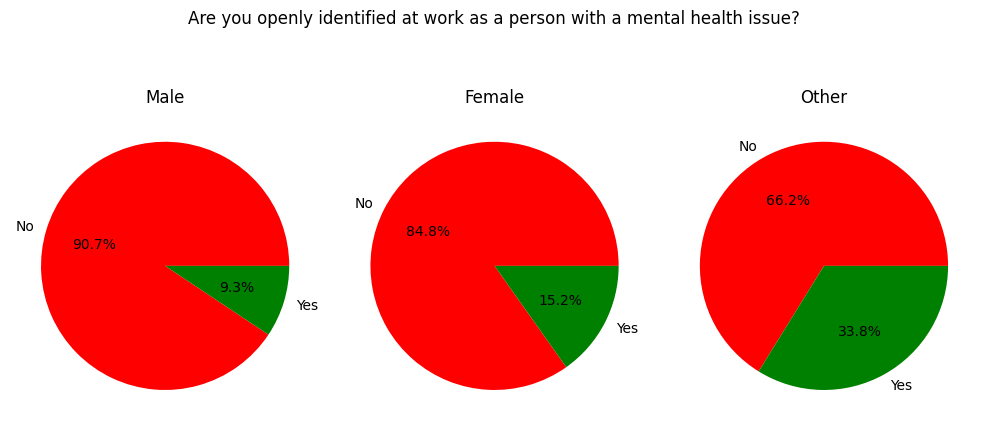

In [ ]:
df_male = df.loc[df[2].eq('Male')]
df_female = df.loc[df[2].eq('Female')]
df_other = df.loc[df[2].eq('Other')]
male_78 = df_male.loc[df_male[78] != '-1'][78].value_counts()
female_78 = df_female.loc[df_female[78] != '-1'][78].value_counts()
other_78 = df_other.loc[df_other[78] != '-1'][78].value_counts()
male_78_labels = male_78.index.map({'1': 'Yes', '0': 'No'})
female_78_labels = female_78.index.map({'1': 'Yes', '0': 'No'})
other_78_labels = other_78.index.map({'1': 'Yes', '0': 'No'})

# Create a figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

colors = ['red', 'green']
# Plot the first pie chart
axs[0].pie(male_78, labels=male_78_labels, autopct='%1.1f%%', colors = colors, startangle=0)
axs[0].set_title('Male')

# Plot the second pie chart
axs[1].pie(female_78, labels=female_78_labels, autopct='%1.1f%%', colors = colors, startangle=0)
axs[1].set_title('Female')

# Plot the third pie chart
axs[2].pie(other_78, labels=other_78_labels, autopct='%1.1f%%', colors = colors, startangle=0)
axs[2].set_title('Other')

# Adjust layout to fit the titles
plt.suptitle('Are you openly identified at work as a person with a mental health issue?', fontsize=12)
plt.tight_layout()
# Show the plot
plt.show()

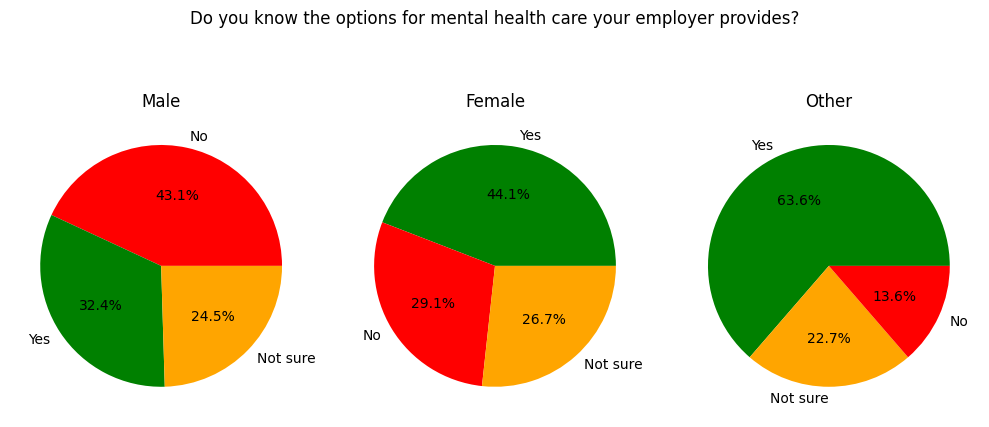

In [ ]:
df_male = df.loc[df[2].eq('Male')]
df_female = df.loc[df[2].eq('Female')]
df_other = df.loc[df[2].eq('Other')]
male_94 = df_male.loc[df_male[94] != '-1'][94].value_counts()
female_94 = df_female.loc[df_female[94] != '-1'][94].value_counts()
other_94 = df_other.loc[df_other[94] != '-1'][94].value_counts()

# Create a figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

colors = ['green', 'red', 'orange', 'yellow', 'gray']
# Plot the first pie chart
axs[0].pie(male_94, labels=male_94.index, autopct='%1.1f%%', colors = ['red', 'green', 'orange'], startangle=0)
axs[0].set_title('Male')

# Plot the second pie chart
axs[1].pie(female_94, labels=female_94.index, autopct='%1.1f%%', colors = colors, startangle=0)
axs[1].set_title('Female')

# Plot the third pie chart
axs[2].pie(other_94, labels=other_94.index, autopct='%1.1f%%', colors = ['green', 'orange', 'red'], startangle=0)
axs[2].set_title('Other')

# Adjust layout to fit the titles
plt.suptitle('Do you know the options for mental health care your employer provides?', fontsize=12)
plt.tight_layout()
# Show the plot
plt.show()

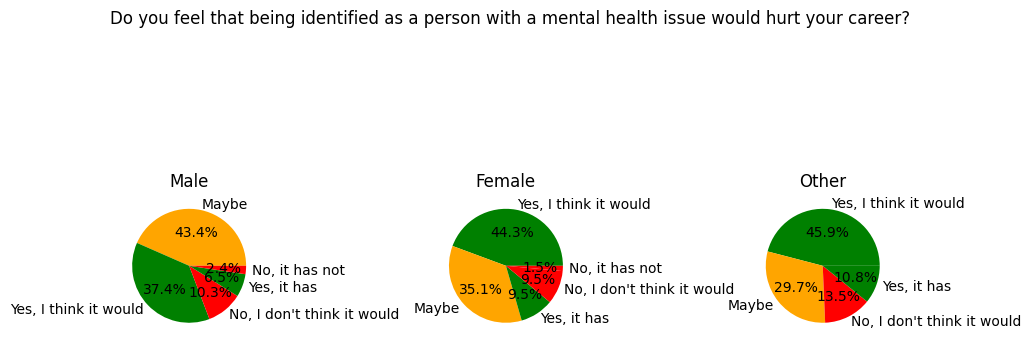

In [ ]:
df_male = df.loc[df[2].eq('Male')]
df_female = df.loc[df[2].eq('Female')]
df_other = df.loc[df[2].eq('Other')]
male_113 = df_male.loc[df_male[113] != '-1'][113].value_counts()
female_113 = df_female.loc[df_female[113] != '-1'][113].value_counts()
other_113 = df_other.loc[df_other[113] != '-1'][113].value_counts()

# Create a figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

colors = ['green', 'red', 'orange', 'yellow', 'gray']
# Plot the first pie chart
axs[0].pie(male_113, labels=male_113.index, autopct='%1.1f%%', colors = ['orange', 'green', 'red', 'green', 'red'], startangle=0)
axs[0].set_title('Male')

# Plot the second pie chart
axs[1].pie(female_113, labels=female_113.index, autopct='%1.1f%%', colors = ['green', 'orange', 'green', 'red', 'red'], startangle=0)
axs[1].set_title('Female')

# Plot the third pie chart
axs[2].pie(other_113, labels=other_113.index, autopct='%1.1f%%', colors = ['green', 'orange', 'red'], startangle=0)
axs[2].set_title('Other')

# Adjust layout to fit the titles
plt.suptitle('Do you feel that being identified as a person with a mental health issue would hurt your career?', fontsize=12)
plt.tight_layout()
# Show the plot
plt.show()

Some of them    610
No              196
Yes             185
Name: 99, dtype: int64


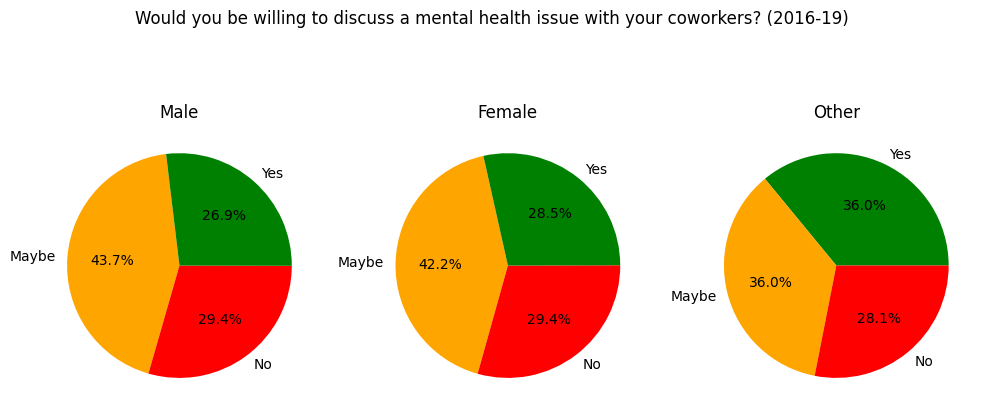

In [ ]:
df_male = df.loc[df[2].eq('Male')]
df_female = df.loc[df[2].eq('Female')]
df_other = df.loc[df[2].eq('Other')]
male_99 = df_male.loc[df_male[99] != '-1'][99].value_counts()
female_99 = df_female.loc[df_female[99] != '-1'][99].value_counts()
other_99 = df_other.loc[df_other[99] != '-1'][99].value_counts()
print(male_99)
# Create a figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

colors = ['orange', 'red', 'green']
'''# Plot the first pie chart
axs[0][0].pie(male_99, labels=male_99.index, autopct='%1.1f%%', colors = colors, startangle=67.32)
axs[0][0].set_title('Male')

# Plot the second pie chart
axs[0][1].pie(female_99, labels=female_99.index, autopct='%1.1f%%', colors = colors, startangle=49.68)
axs[0][1].set_title('Female')

# Plot the third pie chart
axs[0][2].pie(other_99, labels=other_99.index, autopct='%1.1f%%', colors = colors, startangle=98.28)
axs[0][2].set_title('Other')'''

male_18 = df_male.loc[df_male[18] != '-1'][18].value_counts()
female_18 = df_female.loc[df_female[18] != '-1'][18].value_counts()
other_18 = df_other.loc[df_other[18] != '-1'][18].value_counts()

axs[0].pie(male_18, labels=male_18.index, autopct='%1.1f%%', colors = colors, startangle=96.84)
axs[0].set_title('Male')

# Plot the second pie chart
axs[1].pie(female_18, labels=female_18.index, autopct='%1.1f%%', colors = colors,startangle=102.6)
axs[1].set_title('Female')

# Plot the third pie chart
axs[2].pie(other_18, labels=other_18.index, autopct='%1.1f%%', colors = ['green','orange', 'red'])
axs[2].set_title('Other')

# Adjust layout to fit the titles
plt.suptitle('Would you be willing to discuss a mental health issue with your coworkers? (2016-19)', fontsize=12)
plt.tight_layout()
# Show the plot
plt.show()

In [ ]:
print("Chi-Squared Test")
print("Gender vs Willingness to discuss a mental health issue with coworkers")


contingency_table = pd.crosstab(df[2], df[18])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared: {chi2}")
print(f"P-value: {p}")

Chi-Squared Test
Gender vs Willingness to discuss a mental health issue with coworkers
Chi-squared: 7.9545775950535695
P-value: 0.24144999694007394


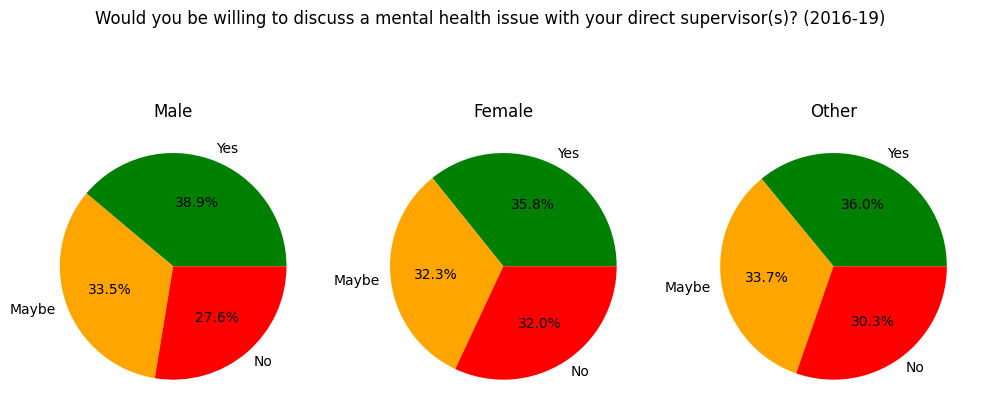

In [ ]:
df_male = df.loc[df[2].eq('Male')]
df_female = df.loc[df[2].eq('Female')]
df_other = df.loc[df[2].eq('Other')]
male_100 = df_male.loc[df_male[100] != '-1'][100].value_counts()
female_100 = df_female.loc[df_female[100] != '-1'][100].value_counts()
other_100 = df_other.loc[df_other[100] != '-1'][100].value_counts()

# Create a figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

colors = ['orange', 'red', 'green']
'''# Plot the first pie chart
axs[0][0].pie(male_100, labels=other_100.index, autopct='%1.1f%%', colors = colors, startangle=92.88)
axs[0][0].set_title('Male')

# Plot the second pie chart
axs[0][1].pie(female_100, labels=other_100.index, autopct='%1.1f%%', colors = colors, startangle=110.88)
axs[0][1].set_title('Female')

# Plot the third pie chart
axs[0][2].pie(other_100, labels=other_100.index, autopct='%1.1f%%', colors = colors, startangle=98.28)
axs[0][2].set_title('Other')'''

male_19 = df_male.loc[df_male[19] != '-1'][19].value_counts()
female_19 = df_female.loc[df_female[19] != '-1'][19].value_counts()
other_19 = df_other.loc[df_other[19] != '-1'][19].value_counts()

axs[0].pie(male_19, labels=male_19.index, autopct='%1.1f%%', colors = ['green','orange', 'red'])
axs[0].set_title('Male')

# Plot the second pie chart
axs[1].pie(female_19, labels=female_19.index, autopct='%1.1f%%', colors = ['green','orange', 'red'])
axs[1].set_title('Female')

# Plot the third pie chart
axs[2].pie(other_19, labels=other_19.index, autopct='%1.1f%%', colors = ['green','orange', 'red'])
axs[2].set_title('Other')

# Adjust layout to fit the titles
plt.suptitle('Would you be willing to discuss a mental health issue with your direct supervisor(s)? (2016-19)', fontsize=12)
plt.tight_layout()
# Show the plot
plt.show()

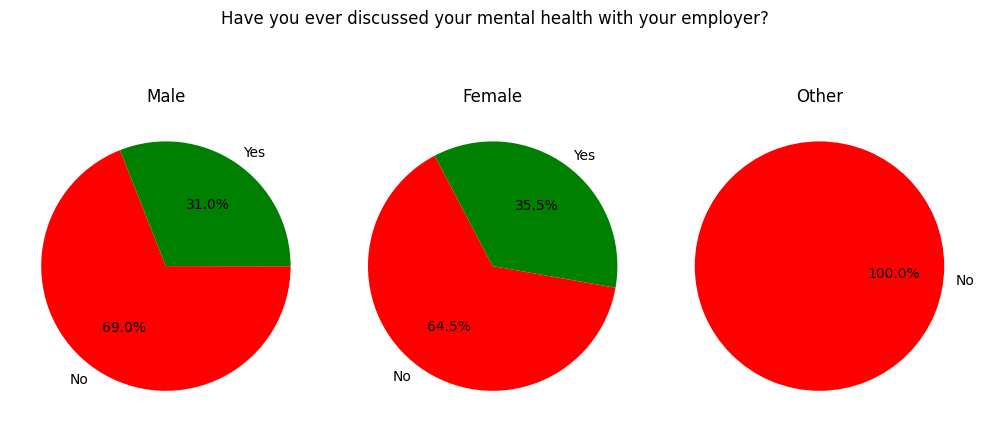

In [ ]:
df_male = df.loc[df[2].eq('Male')]
df_female = df.loc[df[2].eq('Female')]
df_other = df.loc[df[2].eq('Other')]
male_58 = df_male.loc[df_male[58] != '-1'][58].value_counts()
female_58 = df_female.loc[df_female[58] != '-1'][58].value_counts()
other_58 = df_other.loc[df_other[58] != '-1'][58].value_counts()

male_58_labels = male_58.index.map({'1': 'Yes', '0': 'No'})
female_58_labels = female_58.index.map({'1': 'Yes', '0': 'No'})
other_58_labels = other_58.index.map({'1': 'Yes', '0': 'No'})

# Create a figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

colors = ['red', 'green']
# Plot the first pie chart
axs[0].pie(male_58, labels=male_58_labels, autopct='%1.1f%%', colors = colors, startangle=111.6)
axs[0].set_title('Male')

# Plot the second pie chart
axs[1].pie(female_58, labels=female_58_labels, autopct='%1.1f%%', colors = colors, startangle=117.72)
axs[1].set_title('Female')

# Plot the third pie chart
axs[2].pie(other_58, labels=other_58_labels, autopct='%1.1f%%', colors = colors, startangle=173.88)
axs[2].set_title('Other')

# Adjust layout to fit the titles
plt.suptitle('Have you ever discussed your mental health with your employer?', fontsize=12)
plt.tight_layout()
# Show the plot
plt.show()

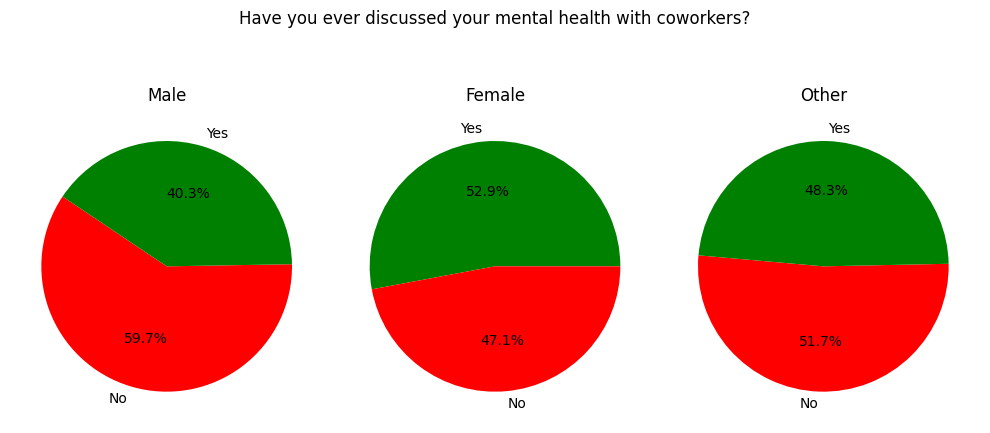

In [ ]:
df_male = df.loc[df[2].eq('Male')]
df_female = df.loc[df[2].eq('Female')]
df_other = df.loc[df[2].eq('Other')]
male_60 = df_male.loc[df_male[60] != '-1'][60].value_counts()
female_60 = df_female.loc[df_female[60] != '-1'][60].value_counts()
other_60 = df_other.loc[df_other[60] != '-1'][60].value_counts()
male_60_labels = male_60.index.map({'1': 'Yes', '0': 'No'})
female_60_labels = female_60.index.map({'1': 'Yes', '0': 'No'})
other_60_labels = other_60.index.map({'1': 'Yes', '0': 'No'})

# Create a figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

colors = ['red', 'green']
# Plot the first pie chart
axs[0].pie(male_60, labels=male_60_labels, autopct='%1.1f%%', colors = colors, startangle=146.16)
axs[0].set_title('Male')

# Plot the second pie chart
axs[1].pie(female_60, labels=female_60_labels, autopct='%1.1f%%', colors = ['green', 'red'], startangle=0)
axs[1].set_title('Female')

# Plot the third pie chart
axs[2].pie(other_60, labels=other_60_labels, autopct='%1.1f%%', colors = colors, startangle=174.96)
axs[2].set_title('Other')

# Adjust layout to fit the titles
plt.suptitle('Have you ever discussed your mental health with coworkers?', fontsize=12)
plt.tight_layout()
# Show the plot
plt.show()

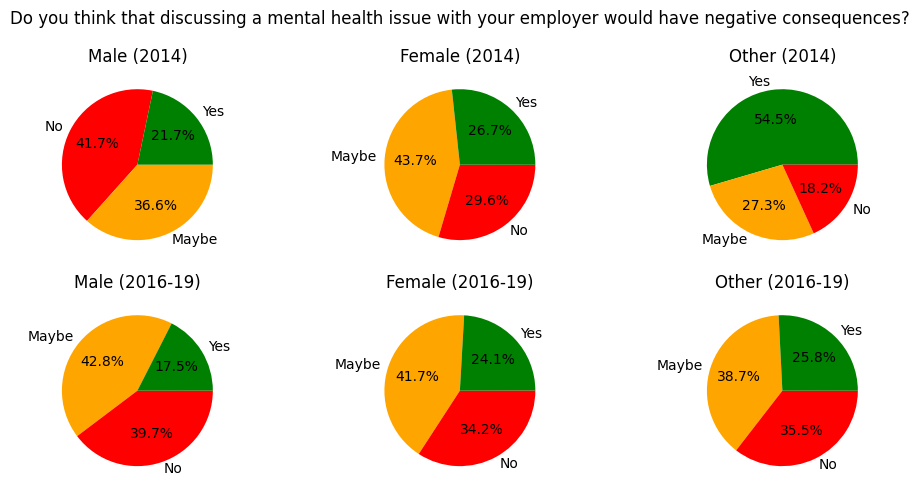

In [ ]:
df_male = df.loc[df[2].eq('Male')]
df_female = df.loc[df[2].eq('Female')]
df_other = df.loc[df[2].eq('Other')]
male_98 = df_male.loc[df_male[98] != '-1'][98].value_counts()
female_98 = df_female.loc[df_female[98] != '-1'][98].value_counts()
other_98 = df_other.loc[df_other[98] != '-1'][98].value_counts()

# Create a figure with 3 subplots
fig, axs = plt.subplots(2, 3, figsize=(10, 5))

colors = ['orange', 'red', 'green']
# Plot the first pie chart
axs[0][0].pie(male_98, labels=male_98.index, autopct='%1.1f%%', colors = ['red', 'orange', 'green'], startangle=78.12)
axs[0][0].set_title('Male (2014)')

# Plot the second pie chart
axs[0][1].pie(female_98, labels=female_98.index, autopct='%1.1f%%', colors = colors, startangle=96.12)
axs[0][1].set_title('Female (2014)')

# Plot the third pie chart
axs[0][2].pie(other_98, labels=other_98.index, autopct='%1.1f%%', colors = ['green', 'orange', 'red'], startangle=0)
axs[0][2].set_title('Other (2014)')

male_104 = df_male.loc[df_male[104] != '-1'][104].value_counts()
female_104 = df_female.loc[df_female[104] != '-1'][104].value_counts()
other_104 = df_other.loc[df_other[104] != '-1'][104].value_counts()

axs[1][0].pie(male_104, labels=male_104.index, autopct='%1.1f%%', colors = colors, startangle=63)
axs[1][0].set_title('Male (2016-19)')

# Plot the second pie chart
axs[1][1].pie(female_104, labels=female_104.index, autopct='%1.1f%%', colors = colors,startangle=86.76)
axs[1][1].set_title('Female (2016-19)')

# Plot the third pie chart
axs[1][2].pie(other_104, labels=other_104.index, autopct='%1.1f%%', colors = colors,startangle=92.88)
axs[1][2].set_title('Other (2016-19)')

# Adjust layout to fit the titles
plt.suptitle('Do you think that discussing a mental health issue with your employer would have negative consequences?', fontsize=12)
plt.tight_layout()
# Show the plot
plt.show()

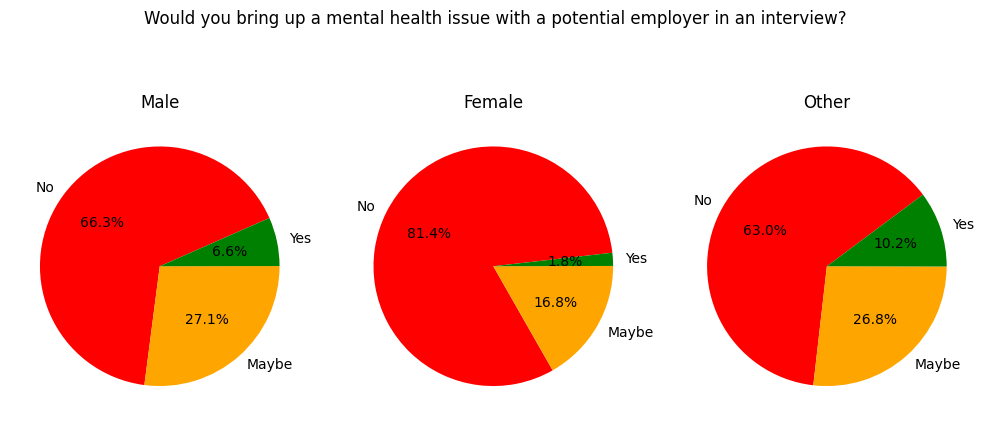

In [ ]:
df_male = df.loc[df[2].eq('Male')]
df_female = df.loc[df[2].eq('Female')]
df_other = df.loc[df[2].eq('Other')]
male_12 = df_male.loc[df_male[12] != '-1'][12].value_counts()
female_12 = df_female.loc[df_female[12] != '-1'][12].value_counts()
other_12 = df_other.loc[df_other[12] != '-1'][12].value_counts()

# Create a figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

colors = ['red', 'orange', 'green']
# Plot the first pie chart
axs[0].pie(male_12, labels=male_12.index, autopct='%1.1f%%', colors = colors, startangle=23.76)
axs[0].set_title('Male')

# Plot the second pie chart
axs[1].pie(female_12, labels=female_12.index, autopct='%1.1f%%', colors = colors, startangle=6.48)
axs[1].set_title('Female')

# Plot the third pie chart
axs[2].pie(other_12, labels=other_12.index, autopct='%1.1f%%', colors = colors, startangle=36.72)
axs[2].set_title('Other')

# Adjust layout to fit the titles
plt.suptitle('Would you bring up a mental health issue with a potential employer in an interview?', fontsize=12)
plt.tight_layout()
# Show the plot
plt.show()

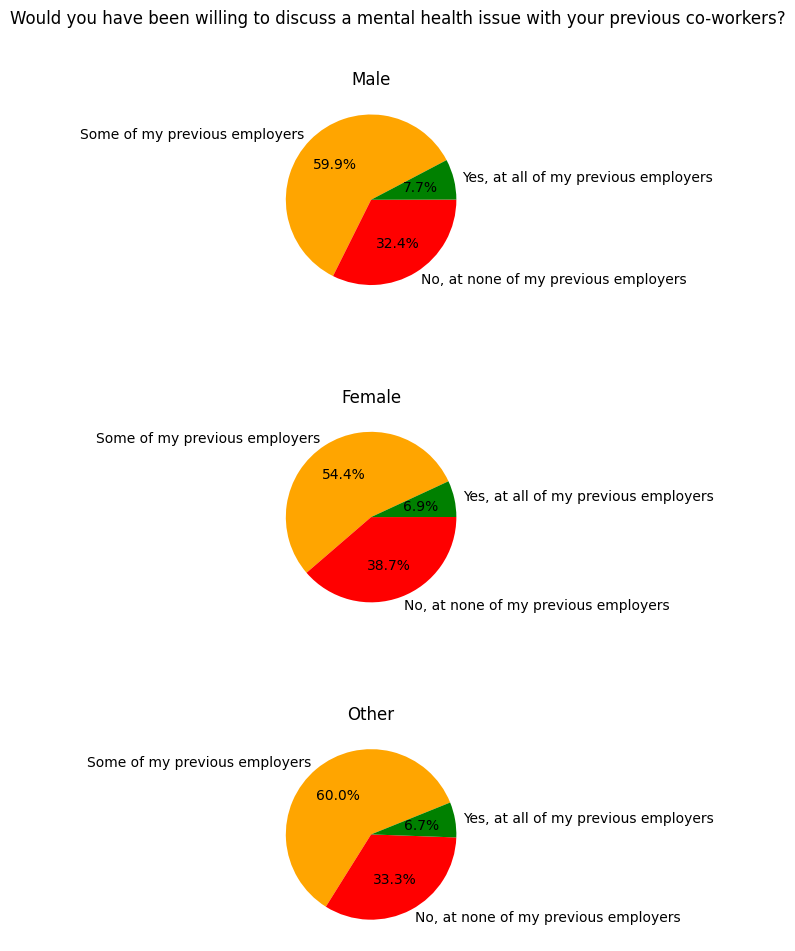

In [ ]:
df_male = df.loc[df[2].eq('Male')]
df_female = df.loc[df[2].eq('Female')]
df_other = df.loc[df[2].eq('Other')]
male_110 = df_male.loc[df_male[110] != '-1'][110].value_counts()
female_110 = df_female.loc[df_female[110] != '-1'][110].value_counts()
other_110 = df_other.loc[df_other[110] != '-1'][110].value_counts()

# Create a figure with 3 subplots
fig, axs = plt.subplots(3, 1, figsize=(5, 10))

colors = ['orange', 'red', 'green']
# Plot the first pie chart
axs[0].pie(male_110, labels=male_110.index, autopct='%1.1f%%', colors = colors, startangle=27.72)
axs[0].set_title('Male')

# Plot the second pie chart
axs[1].pie(female_110, labels=female_110.index, autopct='%1.1f%%', colors = colors, startangle=24.84)
axs[1].set_title('Female')

# Plot the third pie chart
axs[2].pie(other_110, labels=other_110.index, autopct='%1.1f%%', colors = colors, startangle=21.96)
axs[2].set_title('Other')

# Adjust layout to fit the titles
plt.suptitle('Would you have been willing to discuss a mental health issue with your previous co-workers?', fontsize=12)
plt.tight_layout()
# Show the plot
plt.show()

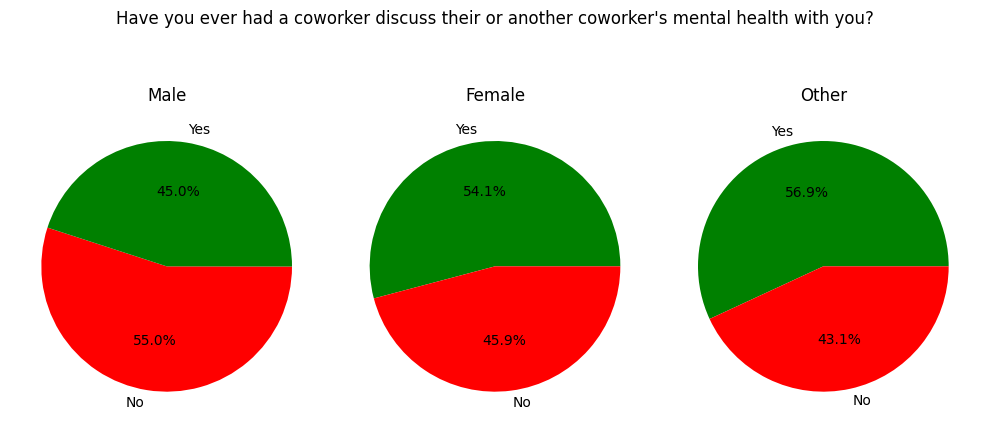

In [ ]:
df_male = df.loc[df[2].eq('Male')]
df_female = df.loc[df[2].eq('Female')]
df_other = df.loc[df[2].eq('Other')]
male_62 = df_male.loc[df_male[62] != '-1'][62].value_counts()
female_62 = df_female.loc[df_female[62] != '-1'][62].value_counts()
other_62 = df_other.loc[df_other[62] != '-1'][62].value_counts()
male_62_labels = male_62.index.map({'1': 'Yes', '0': 'No'})
female_62_labels = female_62.index.map({'1': 'Yes', '0': 'No'})
other_62_labels = other_62.index.map({'1': 'Yes', '0': 'No'})

# Create a figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

colors = ['red','green']
# Plot the first pie chart
axs[0].pie(male_62, labels=male_62_labels, autopct='%1.1f%%', colors = colors, startangle=162)
axs[0].set_title('Male')

# Plot the second pie chart
axs[1].pie(female_62, labels=female_62_labels, autopct='%1.1f%%', colors = ['green','red'], startangle=0)
axs[1].set_title('Female')

# Plot the third pie chart
axs[2].pie(other_62, labels=other_62_labels, autopct='%1.1f%%', colors = ['green','red'], startangle=0)
axs[2].set_title('Other')

# Adjust layout to fit the titles
plt.suptitle('Have you ever had a coworker discuss their or another coworker\'s mental health with you?', fontsize=12)
plt.tight_layout()
# Show the plot
plt.show()

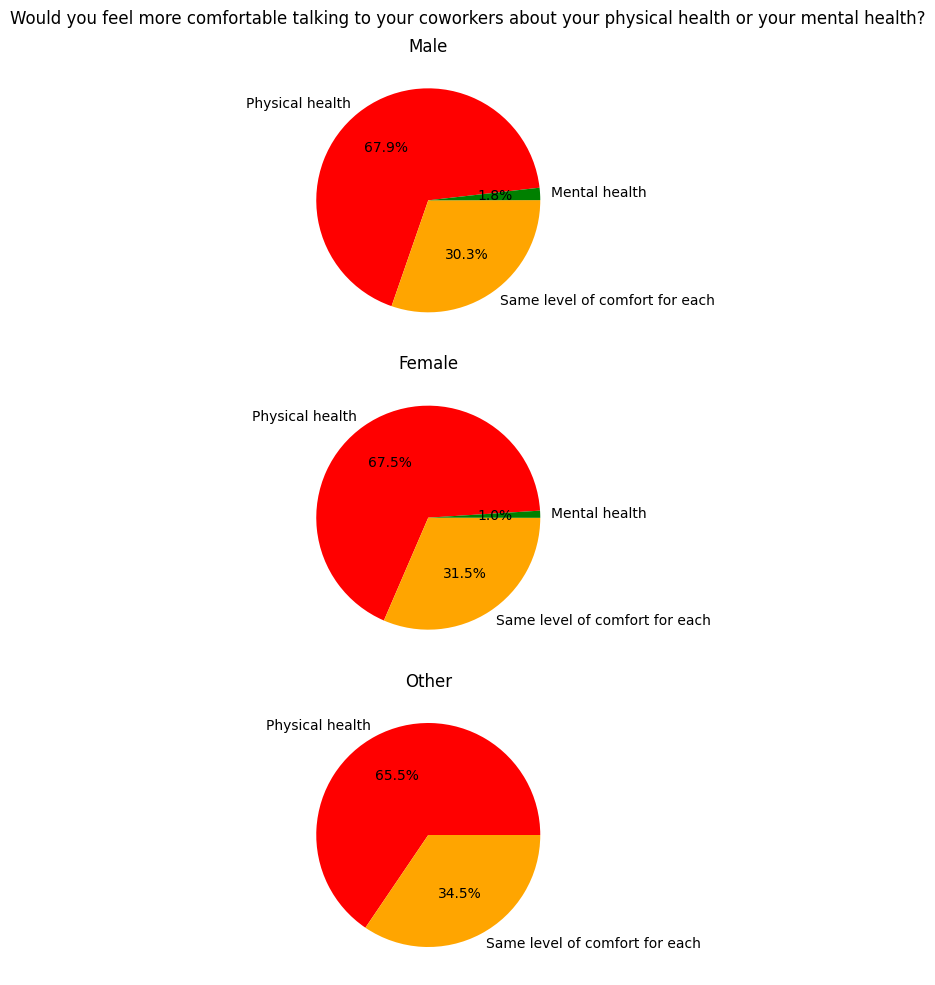

In [ ]:
df_male = df.loc[df[2].eq('Male')]
df_female = df.loc[df[2].eq('Female')]
df_other = df.loc[df[2].eq('Other')]
male_57 = df_male.loc[df_male[57] != '-1'][57].value_counts()
female_57 = df_female.loc[df_female[57] != '-1'][57].value_counts()
other_57 = df_other.loc[df_other[57] != '-1'][57].value_counts()

# Create a figure with 3 subplots
fig, axs = plt.subplots(3, 1, figsize=(5, 10))

colors = ['red', 'orange', 'green']
# Plot the first pie chart
axs[0].pie(male_57, labels=male_57.index, autopct='%1.1f%%', colors = colors, startangle=6.48)
axs[0].set_title('Male')

# Plot the second pie chart
axs[1].pie(female_57, labels=female_57.index, autopct='%1.1f%%', colors = colors, startangle=3.6)
axs[1].set_title('Female')

# Plot the third pie chart
axs[2].pie(other_57, labels=other_57.index, autopct='%1.1f%%', colors = colors, startangle=0)
axs[2].set_title('Other')

# Adjust layout to fit the titles
plt.suptitle('Would you feel more comfortable talking to your coworkers about your physical health or your mental health?', fontsize=12)
plt.tight_layout()
# Show the plot
plt.show()

In [ ]:
df = answer.pivot_table(index=['SurveyID', 'UserID'], columns='QuestionID', values='AnswerText', aggfunc='first')

# Reset the index if needed
df.reset_index(inplace=True)

df.columns

Index(['SurveyID',   'UserID',          1,          2,          3,          4,
                5,          6,          7,          8,
       ...
              109,        110,        111,        112,        113,        114,
              115,        116,        117,        118],
      dtype='object', name='QuestionID', length=107)

[nan '-1' 'White' 'More than one of the above' 'Asian'
 'Black or African American' 'I prefer not to answer'
 'American Indian or Alaska Native' 'Hispanic' 'White Hispanic'
 'European American' 'Caucasian']
White                               873
-1                                  537
More than one of the above           35
Asian                                31
I prefer not to answer               29
Black or African American            15
American Indian or Alaska Native      1
Hispanic                              1
White Hispanic                        1
European American                     1
Caucasian                             1
Name: 89, dtype: int64


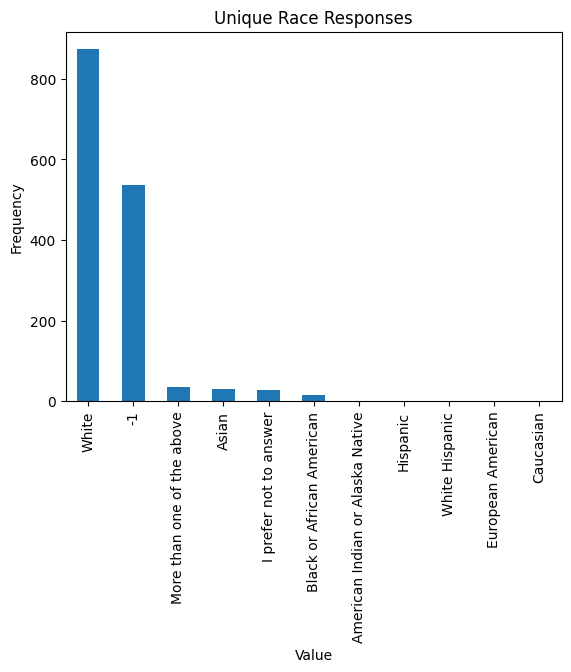

In [ ]:
races = df[89]
print(df[89].unique())
# Plot the frequency of each value
print(races.value_counts())
races.value_counts().plot(kind='bar')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Unique Race Responses')
plt.show()

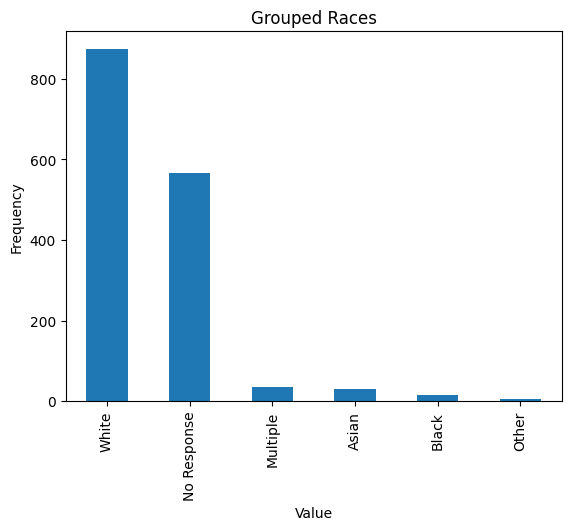

In [5]:
def categorize_race(race):
    if race == 'White' or race == 'Caucasian':
        return 'White'
    elif race == 'Black or African American':
        return 'Black'
    elif race == 'Asian':
        return 'Asian'
    elif race == 'More than one of the above':
        return 'Multiple'
    elif race == '-1' or race == 'I prefer not to answer':
        return 'No Response'
    elif race in ['American Indian or Alaska Native', 'Hispanic', 'White Hispanic', 'European American']:
        return 'Other'

# Apply the function to the '2' column
df[89] = df[89].apply(categorize_race)

# Now the '2' column should have only 'Male', 'Female', or 'Other' values
df[89].value_counts().plot(kind='bar')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Grouped Races')
plt.show()

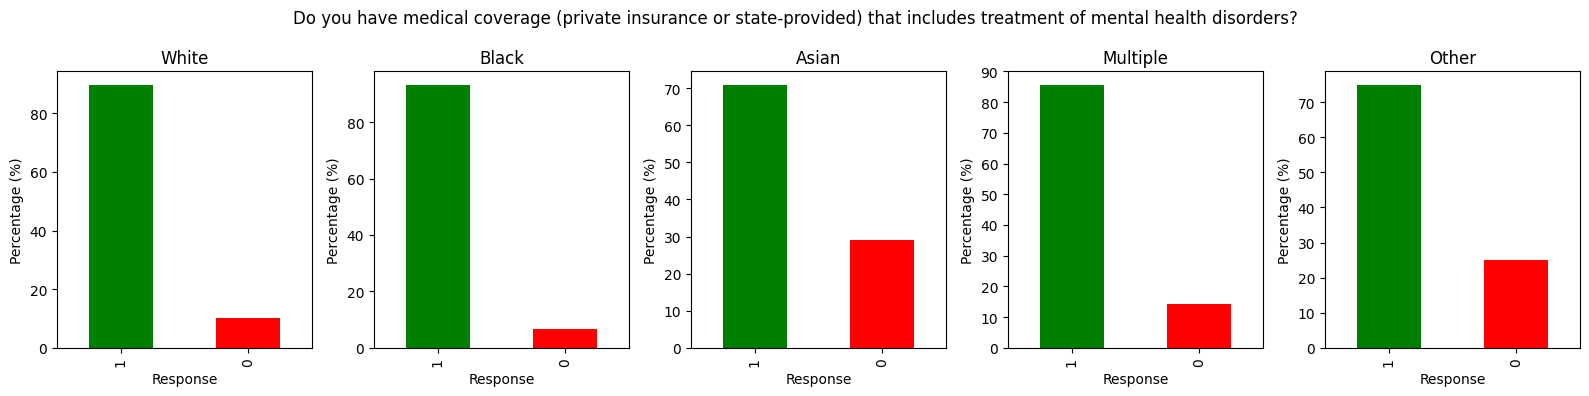

In [9]:
df_white = df.loc[df[89].eq('White')]
df_black = df.loc[df[89].eq('Black')]
df_asian = df.loc[df[89].eq('Asian')]
df_multiple = df.loc[df[89].eq('Multiple')]
df_other_race = df.loc[df[89].eq('Other')]
white_22 = df_white.loc[df_white[22] != '-1'][22].value_counts()
black_22 = df_black.loc[df_black[22] != '-1'][22].value_counts()
asian_22 = df_asian.loc[df_asian[22] != '-1'][22].value_counts()
multiple_22 = df_multiple.loc[df_multiple[22] != '-1'][22].value_counts()
other_races_22 = df_other_race.loc[df_other_race[22] != '-1'][22].value_counts()
total_white = white_22.sum()
white_22 = white_22 / total_white * 100
total_black = black_22.sum()
black_22 = black_22 / total_black * 100
total_asian = asian_22.sum()
asian_22 = asian_22 / total_asian * 100
total_multiple = multiple_22.sum()
multiple_22 = multiple_22 / total_multiple * 100
total_other = other_races_22.sum()
other_races_22 = other_races_22 / total_other * 100
colors = ['green', 'red']
fig, axs = plt.subplots(1, 5, figsize=(16, 4))

white_22.plot(kind='bar', ax=axs[0], color=colors)
axs[0].set_xlabel('Response')
axs[0].set_ylabel('Percentage (%)')
axs[0].set_title('White')

black_22.plot(kind='bar', ax=axs[1], color=colors)
axs[1].set_xlabel('Response')
axs[1].set_ylabel('Percentage (%)')
axs[1].set_title('Black')

asian_22.plot(kind='bar', ax=axs[2], color=colors)
axs[2].set_xlabel('Response')
axs[2].set_ylabel('Percentage (%)')
axs[2].set_title('Asian')

multiple_22.plot(kind='bar', ax=axs[3], color=colors)
axs[3].set_xlabel('Response')
axs[3].set_ylabel('Percentage (%)')
axs[3].set_title('Multiple')

other_races_22.plot(kind='bar', ax=axs[4], color=colors)
axs[4].set_xlabel('Response')
axs[4].set_ylabel('Percentage (%)')
axs[4].set_title('Other')

plt.suptitle('Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?', fontsize=12)
plt.tight_layout()
plt.show()

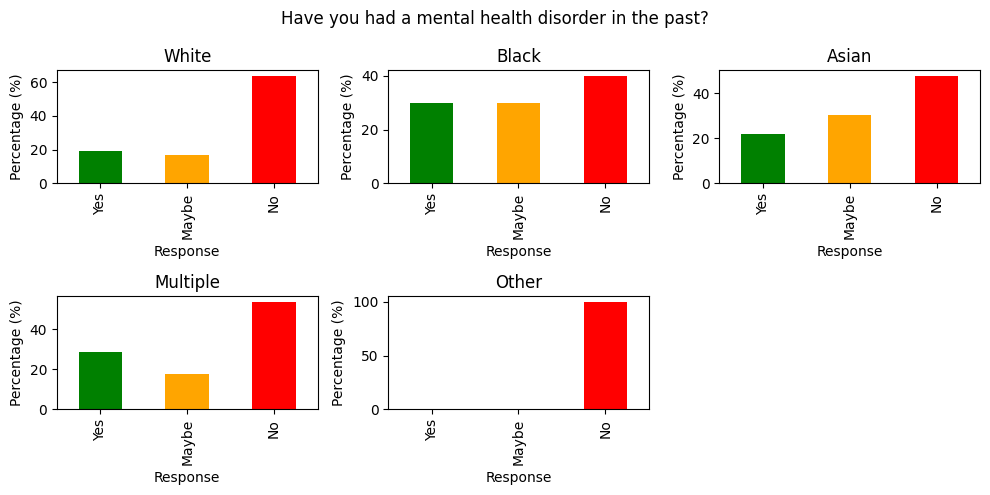

In [ ]:
df_white = df.loc[df[89].eq('White')]
df_black = df.loc[df[89].eq('Black')]
df_asian = df.loc[df[89].eq('Asian')]
df_multiple = df.loc[df[89].eq('Multiple')]
df_other_race = df.loc[df[89].eq('Other')]
white_31 = df_white.loc[df_white[31] != '-1'][31].value_counts()
black_31 = df_black.loc[df_black[31] != '-1'][31].value_counts()
asian_31 = df_asian.loc[df_asian[31] != '-1'][31].value_counts()
multiple_31 = df_multiple.loc[df_multiple[31] != '-1'][31].value_counts()
other_races_31 = df_other_race.loc[df_other_race[31] != '-1'][31].value_counts()
total_white = white_31.sum()
white_31 = white_31 / total_white * 100
total_black = black_31.sum()
black_31 = black_31 / total_black * 100
total_asian = asian_31.sum()
asian_31 = asian_31 / total_asian * 100
total_multiple = multiple_31.sum()
multiple_31 = multiple_31 / total_multiple * 100
total_other = other_races_31.sum()
other_races_31 = other_races_31 / total_other * 100
order = ['Yes', 'Maybe', 'No']
white_31 = white_31.reindex(order)
black_31 = black_31.reindex(order)
asian_31 = asian_31.reindex(order)
multiple_31 = multiple_31.reindex(order)
other_races_31 = other_races_31.reindex(order)
colors = ['green', 'orange', 'red']
fig, axs = plt.subplots(2, 3, figsize=(10, 5))

white_31.plot(kind='bar', ax=axs[0][0], color=colors)
axs[0][0].set_xlabel('Response')
axs[0][0].set_ylabel('Percentage (%)')
axs[0][0].set_title('White')

black_31.plot(kind='bar', ax=axs[0][1], color=colors)
axs[0][1].set_xlabel('Response')
axs[0][1].set_ylabel('Percentage (%)')
axs[0][1].set_title('Black')

asian_31.plot(kind='bar', ax=axs[0][2], color=colors)
axs[0][2].set_xlabel('Response')
axs[0][2].set_ylabel('Percentage (%)')
axs[0][2].set_title('Asian')

multiple_31.plot(kind='bar', ax=axs[1][0], color=colors)
axs[1][0].set_xlabel('Response')
axs[1][0].set_ylabel('Percentage (%)')
axs[1][0].set_title('Multiple')

other_races_31.plot(kind='bar', ax=axs[1][1], color=colors)
axs[1][1].set_xlabel('Response')
axs[1][1].set_ylabel('Percentage (%)')
axs[1][1].set_title('Other')
axs[1][2].axis('off')

plt.suptitle('Have you had a mental health disorder in the past?', fontsize=12)
plt.tight_layout()
plt.show()

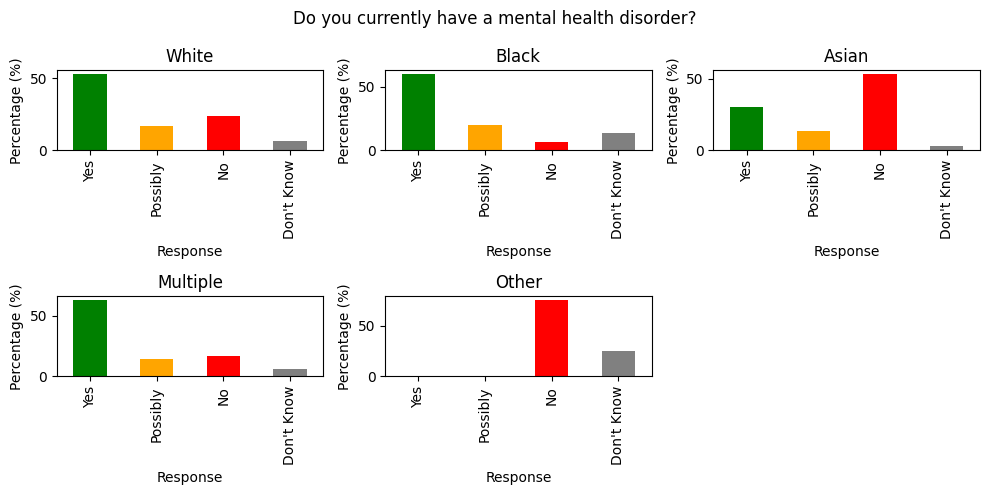

In [ ]:
df_white = df.loc[df[89].eq('White')]
df_black = df.loc[df[89].eq('Black')]
df_asian = df.loc[df[89].eq('Asian')]
df_multiple = df.loc[df[89].eq('Multiple')]
df_other_race = df.loc[df[89].eq('Other')]
white_32 = df_white.loc[df_white[32] != '-1'][32].value_counts()
black_32 = df_black.loc[df_black[32] != '-1'][32].value_counts()
asian_32 = df_asian.loc[df_asian[32] != '-1'][32].value_counts()
multiple_32 = df_multiple.loc[df_multiple[32] != '-1'][32].value_counts()
other_races_32 = df_other_race.loc[df_other_race[32] != '-1'][32].value_counts()
total_white = white_32.sum()
white_32 = white_32 / total_white * 100
total_black = black_32.sum()
black_32 = black_32 / total_black * 100
total_asian = asian_32.sum()
asian_32 = asian_32 / total_asian * 100
total_multiple = multiple_32.sum()
multiple_32 = multiple_32 / total_multiple * 100
total_other = other_races_32.sum()
other_races_32 = other_races_32 / total_other * 100
order = ['Yes', 'Possibly', 'No', 'Don\'t Know']
colors = ['green', 'orange', 'red', 'gray']
white_32 = white_32.reindex(order)
black_32 = black_32.reindex(order)
asian_32 = asian_32.reindex(order)
multiple_32 = multiple_32.reindex(order)
other_races_32 = other_races_32.reindex(order)
fig, axs = plt.subplots(2, 3, figsize=(10, 5))

white_32.plot(kind='bar', ax=axs[0][0], color=colors)
axs[0][0].set_xlabel('Response')
axs[0][0].set_ylabel('Percentage (%)')
axs[0][0].set_title('White')

black_32.plot(kind='bar', ax=axs[0][1], color=colors)
axs[0][1].set_xlabel('Response')
axs[0][1].set_ylabel('Percentage (%)')
axs[0][1].set_title('Black')

asian_32.plot(kind='bar', ax=axs[0][2], color=colors)
axs[0][2].set_xlabel('Response')
axs[0][2].set_ylabel('Percentage (%)')
axs[0][2].set_title('Asian')

multiple_32.plot(kind='bar', ax=axs[1][0], color=colors)
axs[1][0].set_xlabel('Response')
axs[1][0].set_ylabel('Percentage (%)')
axs[1][0].set_title('Multiple')

other_races_32.plot(kind='bar', ax=axs[1][1], color=colors)
axs[1][1].set_xlabel('Response')
axs[1][1].set_ylabel('Percentage (%)')
axs[1][1].set_title('Other')
axs[1][2].axis('off')

plt.suptitle('Do you currently have a mental health disorder?', fontsize=12)
plt.tight_layout()
plt.show()

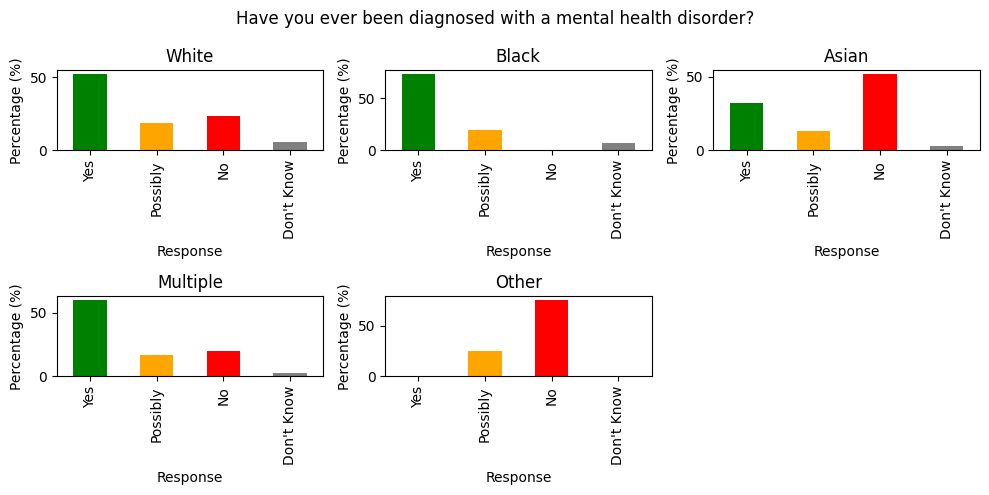

In [ ]:
df_white = df.loc[df[89].eq('White')]
df_black = df.loc[df[89].eq('Black')]
df_asian = df.loc[df[89].eq('Asian')]
df_multiple = df.loc[df[89].eq('Multiple')]
df_other_race = df.loc[df[89].eq('Other')]
white_33 = df_white.loc[df_white[33] != '-1'][33].value_counts()
black_33 = df_black.loc[df_black[33] != '-1'][33].value_counts()
asian_33 = df_asian.loc[df_asian[33] != '-1'][33].value_counts()
multiple_33 = df_multiple.loc[df_multiple[33] != '-1'][33].value_counts()
other_races_33 = df_other_race.loc[df_other_race[33] != '-1'][33].value_counts()
total_white = white_33.sum()
white_33 = white_33 / total_white * 100
total_black = black_33.sum()
black_33 = black_33 / total_black * 100
total_asian = asian_33.sum()
asian_33 = asian_33 / total_asian * 100
total_multiple = multiple_33.sum()
multiple_33 = multiple_33 / total_multiple * 100
total_other = other_races_33.sum()
other_races_33 = other_races_33 / total_other * 100
order = ['Yes', 'Possibly', 'No', 'Don\'t Know']
white_33 = white_33.reindex(order)
black_33 = black_33.reindex(order)
asian_33 = asian_33.reindex(order)
multiple_33 = multiple_33.reindex(order)
other_races_33 = other_races_33.reindex(order)
colors = ['green', 'orange', 'red', 'gray']
fig, axs = plt.subplots(2, 3, figsize=(10, 5))

white_33.plot(kind='bar', ax=axs[0][0], color=colors)
axs[0][0].set_xlabel('Response')
axs[0][0].set_ylabel('Percentage (%)')
axs[0][0].set_title('White')

black_33.plot(kind='bar', ax=axs[0][1], color=colors)
axs[0][1].set_xlabel('Response')
axs[0][1].set_ylabel('Percentage (%)')
axs[0][1].set_title('Black')

asian_33.plot(kind='bar', ax=axs[0][2], color=colors)
axs[0][2].set_xlabel('Response')
axs[0][2].set_ylabel('Percentage (%)')
axs[0][2].set_title('Asian')

multiple_33.plot(kind='bar', ax=axs[1][0], color=colors)
axs[1][0].set_xlabel('Response')
axs[1][0].set_ylabel('Percentage (%)')
axs[1][0].set_title('Multiple')

other_races_33.plot(kind='bar', ax=axs[1][1], color=colors)
axs[1][1].set_xlabel('Response')
axs[1][1].set_ylabel('Percentage (%)')
axs[1][1].set_title('Other')
axs[1][2].axis('off')

plt.suptitle('Have you ever been diagnosed with a mental health disorder?', fontsize=12)
plt.tight_layout()
plt.show()

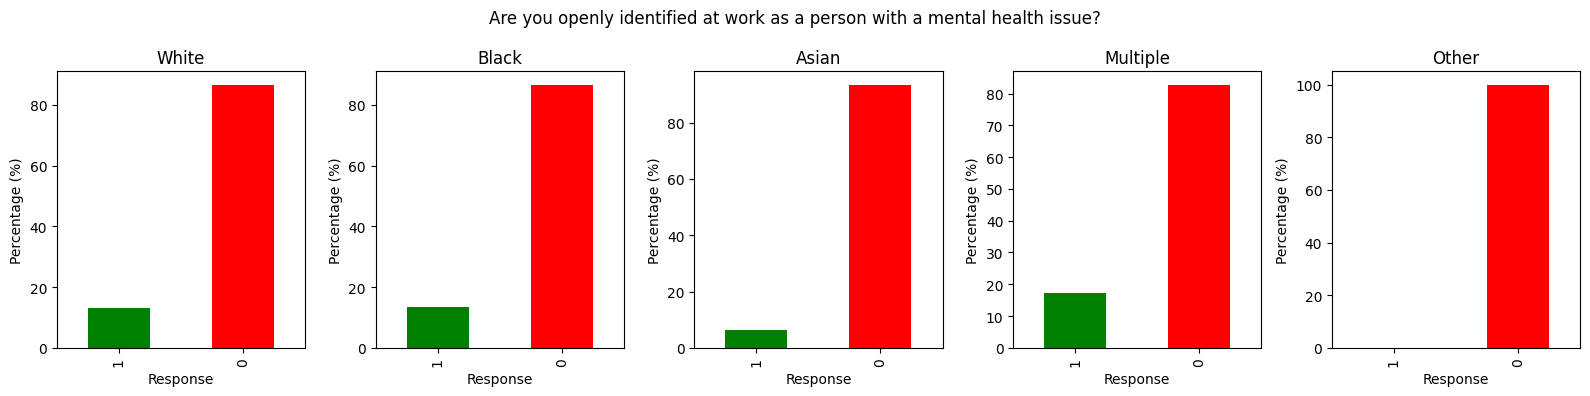

In [10]:
df_white = df.loc[df[89].eq('White')]
df_black = df.loc[df[89].eq('Black')]
df_asian = df.loc[df[89].eq('Asian')]
df_multiple = df.loc[df[89].eq('Multiple')]
df_other_race = df.loc[df[89].eq('Other')]
white_78 = df_white.loc[df_white[78] != '-1'][78].value_counts()
black_78 = df_black.loc[df_black[78] != '-1'][78].value_counts()
asian_78 = df_asian.loc[df_asian[78] != '-1'][78].value_counts()
multiple_78 = df_multiple.loc[df_multiple[78] != '-1'][78].value_counts()
other_races_78 = df_other_race.loc[df_other_race[78] != '-1'][78].value_counts()
total_white = white_78.sum()
white_78 = white_78 / total_white * 100
total_black = black_78.sum()
black_78 = black_78 / total_black * 100
total_asian = asian_78.sum()
asian_78 = asian_78 / total_asian * 100
total_multiple = multiple_78.sum()
multiple_78 = multiple_78 / total_multiple * 100
total_other = other_races_78.sum()
other_races_78 = other_races_78 / total_other * 100
order = ['1', '0']
white_78 = white_78.reindex(order)
black_78 = black_78.reindex(order)
asian_78 = asian_78.reindex(order)
multiple_78 = multiple_78.reindex(order)
other_races_78 = other_races_78.reindex(order)
colors = ['green', 'red']
fig, axs = plt.subplots(1, 5, figsize=(16, 4))

white_78.plot(kind='bar', ax=axs[0], color=colors)
axs[0].set_xlabel('Response')
axs[0].set_ylabel('Percentage (%)')
axs[0].set_title('White')

black_78.plot(kind='bar', ax=axs[1], color=colors)
axs[1].set_xlabel('Response')
axs[1].set_ylabel('Percentage (%)')
axs[1].set_title('Black')

asian_78.plot(kind='bar', ax=axs[2], color=colors)
axs[2].set_xlabel('Response')
axs[2].set_ylabel('Percentage (%)')
axs[2].set_title('Asian')

multiple_78.plot(kind='bar', ax=axs[3], color=colors)
axs[3].set_xlabel('Response')
axs[3].set_ylabel('Percentage (%)')
axs[3].set_title('Multiple')

other_races_78.plot(kind='bar', ax=axs[4], color=colors)
axs[4].set_xlabel('Response')
axs[4].set_ylabel('Percentage (%)')
axs[4].set_title('Other')

plt.suptitle('Are you openly identified at work as a person with a mental health issue?', fontsize=12)
plt.tight_layout()
plt.show()

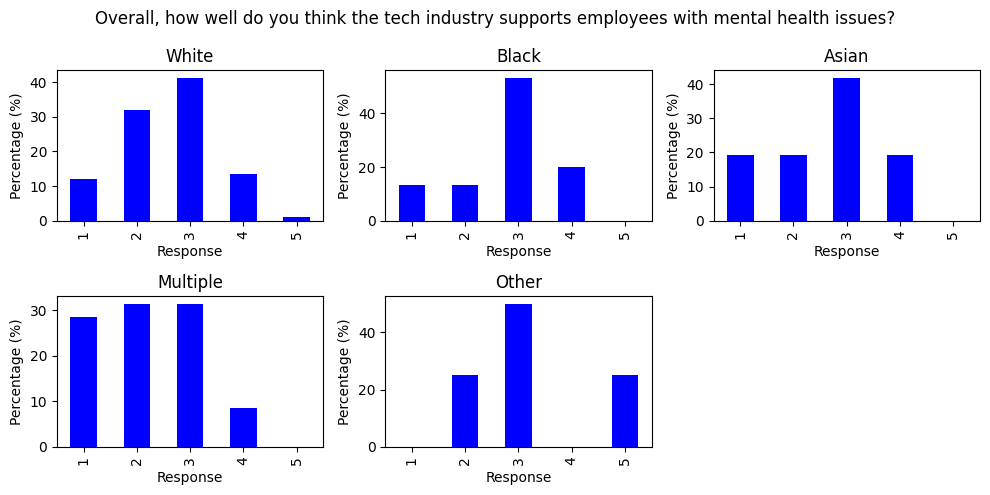

In [ ]:
df_white = df.loc[df[89].eq('White')]
df_black = df.loc[df[89].eq('Black')]
df_asian = df.loc[df[89].eq('Asian')]
df_multiple = df.loc[df[89].eq('Multiple')]
df_other_race = df.loc[df[89].eq('Other')]
white_85 = df_white.loc[df_white[85] != '-1'][85].value_counts()
black_85 = df_black.loc[df_black[85] != '-1'][85].value_counts()
asian_85 = df_asian.loc[df_asian[85] != '-1'][85].value_counts()
multiple_85 = df_multiple.loc[df_multiple[85] != '-1'][85].value_counts()
other_races_85 = df_other_race.loc[df_other_race[85] != '-1'][85].value_counts()
total_white = white_85.sum()
white_85 = white_85 / total_white * 100
total_black = black_85.sum()
black_85 = black_85 / total_black * 100
total_asian = asian_85.sum()
asian_85 = asian_85 / total_asian * 100
total_multiple = multiple_85.sum()
multiple_85 = multiple_85 / total_multiple * 100
total_other = other_races_85.sum()
other_races_85 = other_races_85 / total_other * 100
order = ['1', '2', '3', '4', '5']
white_85 = white_85.reindex(order)
black_85 = black_85.reindex(order)
asian_85 = asian_85.reindex(order)
multiple_85 = multiple_85.reindex(order)
other_races_85 = other_races_85.reindex(order)
colors = ['blue']
fig, axs = plt.subplots(2, 3, figsize=(10, 5))

white_85.plot(kind='bar', ax=axs[0][0], color=colors)
axs[0][0].set_xlabel('Response')
axs[0][0].set_ylabel('Percentage (%)')
axs[0][0].set_title('White')

black_85.plot(kind='bar', ax=axs[0][1], color=colors)
axs[0][1].set_xlabel('Response')
axs[0][1].set_ylabel('Percentage (%)')
axs[0][1].set_title('Black')

asian_85.plot(kind='bar', ax=axs[0][2], color=colors)
axs[0][2].set_xlabel('Response')
axs[0][2].set_ylabel('Percentage (%)')
axs[0][2].set_title('Asian')

multiple_85.plot(kind='bar', ax=axs[1][0], color=colors)
axs[1][0].set_xlabel('Response')
axs[1][0].set_ylabel('Percentage (%)')
axs[1][0].set_title('Multiple')

other_races_85.plot(kind='bar', ax=axs[1][1], color=colors)
axs[1][1].set_xlabel('Response')
axs[1][1].set_ylabel('Percentage (%)')
axs[1][1].set_title('Other')
axs[1][2].axis('off')

plt.suptitle('Overall, how well do you think the tech industry supports employees with mental health issues?', fontsize=12)
plt.tight_layout()
plt.show()

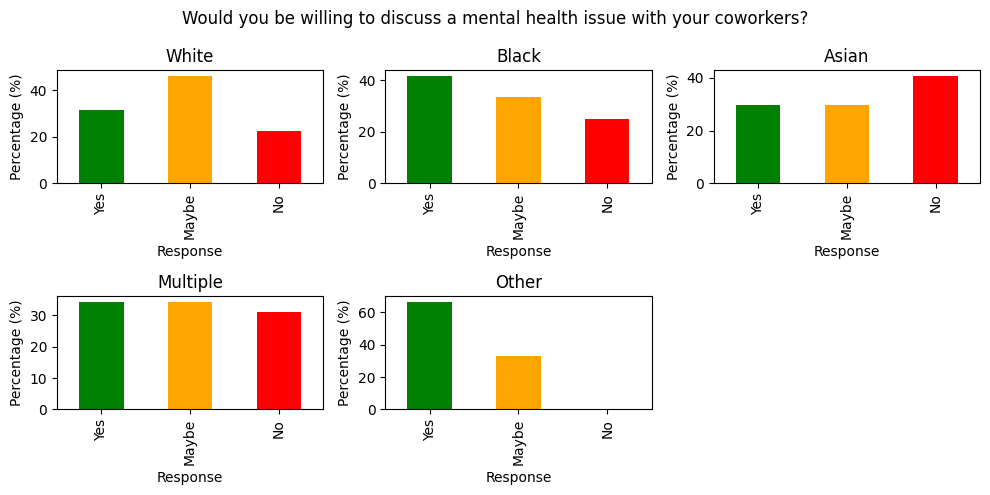

In [ ]:
df_white = df.loc[df[89].eq('White')]
df_black = df.loc[df[89].eq('Black')]
df_asian = df.loc[df[89].eq('Asian')]
df_multiple = df.loc[df[89].eq('Multiple')]
df_other_race = df.loc[df[89].eq('Other')]
white_18 = df_white.loc[df_white[18] != '-1'][18].value_counts()
black_18 = df_black.loc[df_black[18] != '-1'][18].value_counts()
asian_18 = df_asian.loc[df_asian[18] != '-1'][18].value_counts()
multiple_18 = df_multiple.loc[df_multiple[18] != '-1'][18].value_counts()
other_races_18 = df_other_race.loc[df_other_race[18] != '-1'][18].value_counts()
total_white = white_18.sum()
white_18 = white_18 / total_white * 100
total_black = black_18.sum()
black_18 = black_18 / total_black * 100
total_asian = asian_18.sum()
asian_18 = asian_18 / total_asian * 100
total_multiple = multiple_18.sum()
multiple_18 = multiple_18 / total_multiple * 100
total_other = other_races_18.sum()
other_races_18 = other_races_18 / total_other * 100
order = ['Yes', 'Maybe', 'No']
white_18 = white_18.reindex(order)
black_18 = black_18.reindex(order)
asian_18 = asian_18.reindex(order)
multiple_18 = multiple_18.reindex(order)
other_races_18 = other_races_18.reindex(order)
colors = ['green', 'orange', 'red']
fig, axs = plt.subplots(2, 3, figsize=(10, 5))

white_18.plot(kind='bar', ax=axs[0][0], color=colors)
axs[0][0].set_xlabel('Response')
axs[0][0].set_ylabel('Percentage (%)')
axs[0][0].set_title('White')

black_18.plot(kind='bar', ax=axs[0][1], color=colors)
axs[0][1].set_xlabel('Response')
axs[0][1].set_ylabel('Percentage (%)')
axs[0][1].set_title('Black')

asian_18.plot(kind='bar', ax=axs[0][2], color=colors)
axs[0][2].set_xlabel('Response')
axs[0][2].set_ylabel('Percentage (%)')
axs[0][2].set_title('Asian')

multiple_18.plot(kind='bar', ax=axs[1][0], color=colors)
axs[1][0].set_xlabel('Response')
axs[1][0].set_ylabel('Percentage (%)')
axs[1][0].set_title('Multiple')

other_races_18.plot(kind='bar', ax=axs[1][1], color=colors)
axs[1][1].set_xlabel('Response')
axs[1][1].set_ylabel('Percentage (%)')
axs[1][1].set_title('Other')
axs[1][2].axis('off')

plt.suptitle('Would you be willing to discuss a mental health issue with your coworkers?', fontsize=12)
plt.tight_layout()
plt.show()

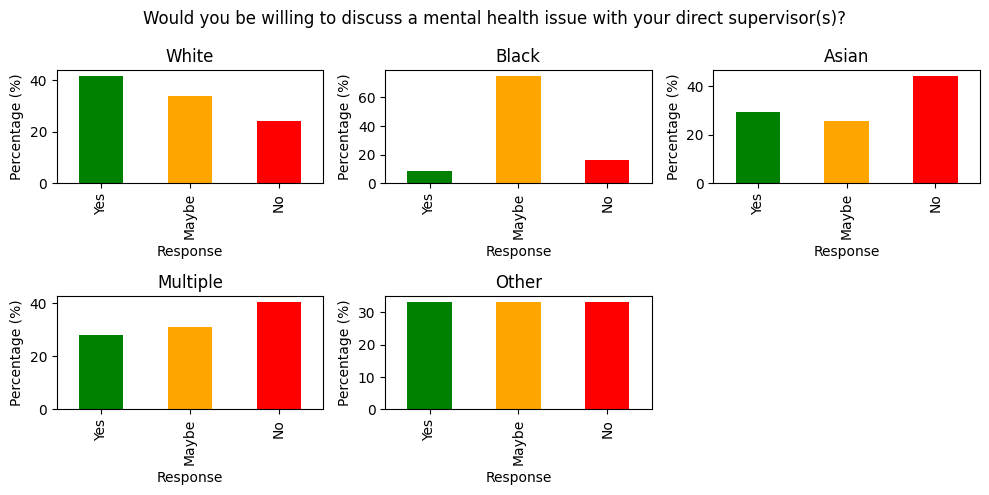

In [ ]:
df_white = df.loc[df[89].eq('White')]
df_black = df.loc[df[89].eq('Black')]
df_asian = df.loc[df[89].eq('Asian')]
df_multiple = df.loc[df[89].eq('Multiple')]
df_other_race = df.loc[df[89].eq('Other')]
white_19 = df_white.loc[df_white[19] != '-1'][19].value_counts()
black_19 = df_black.loc[df_black[19] != '-1'][19].value_counts()
asian_19 = df_asian.loc[df_asian[19] != '-1'][19].value_counts()
multiple_19 = df_multiple.loc[df_multiple[19] != '-1'][19].value_counts()
other_races_19 = df_other_race.loc[df_other_race[19] != '-1'][19].value_counts()
total_white = white_19.sum()
white_19 = white_19 / total_white * 100
total_black = black_19.sum()
black_19 = black_19 / total_black * 100
total_asian = asian_19.sum()
asian_19 = asian_19 / total_asian * 100
total_multiple = multiple_19.sum()
multiple_19 = multiple_19 / total_multiple * 100
total_other = other_races_19.sum()
other_races_19 = other_races_19 / total_other * 100
order = ['Yes', 'Maybe', 'No']
white_19 = white_19.reindex(order)
black_19 = black_19.reindex(order)
asian_19 = asian_19.reindex(order)
multiple_19 = multiple_19.reindex(order)
other_races_19 = other_races_19.reindex(order)
colors = ['green', 'orange', 'red']
fig, axs = plt.subplots(2, 3, figsize=(10, 5))

white_19.plot(kind='bar', ax=axs[0][0], color=colors)
axs[0][0].set_xlabel('Response')
axs[0][0].set_ylabel('Percentage (%)')
axs[0][0].set_title('White')

black_19.plot(kind='bar', ax=axs[0][1], color=colors)
axs[0][1].set_xlabel('Response')
axs[0][1].set_ylabel('Percentage (%)')
axs[0][1].set_title('Black')

asian_19.plot(kind='bar', ax=axs[0][2], color=colors)
axs[0][2].set_xlabel('Response')
axs[0][2].set_ylabel('Percentage (%)')
axs[0][2].set_title('Asian')

multiple_19.plot(kind='bar', ax=axs[1][0], color=colors)
axs[1][0].set_xlabel('Response')
axs[1][0].set_ylabel('Percentage (%)')
axs[1][0].set_title('Multiple')

other_races_19.plot(kind='bar', ax=axs[1][1], color=colors)
axs[1][1].set_xlabel('Response')
axs[1][1].set_ylabel('Percentage (%)')
axs[1][1].set_title('Other')
axs[1][2].axis('off')

plt.suptitle('Would you be willing to discuss a mental health issue with your direct supervisor(s)?', fontsize=12)
plt.tight_layout()
plt.show()

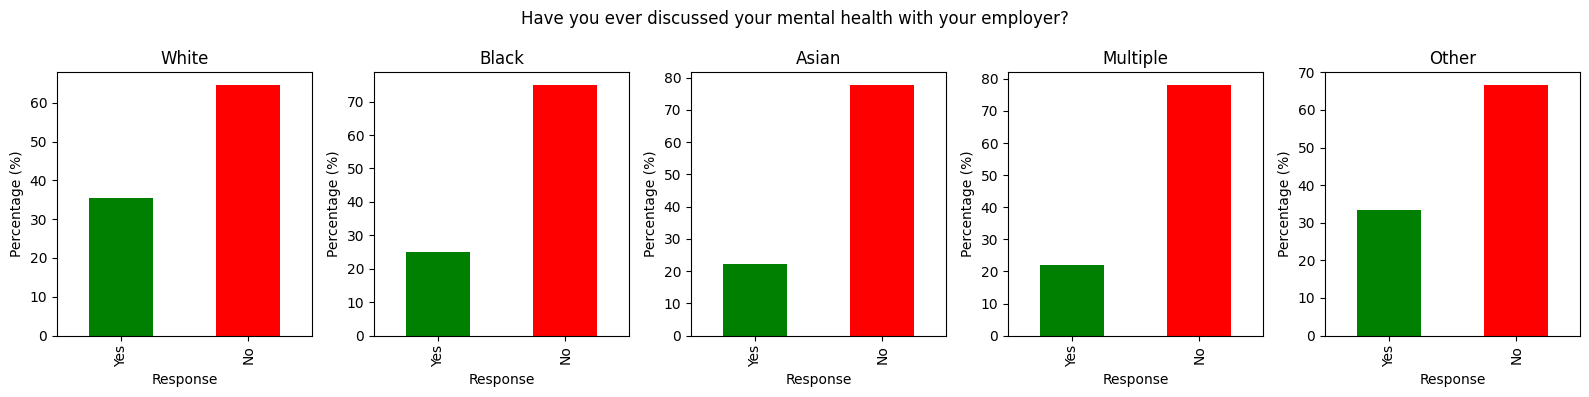

In [ ]:
df_white = df.loc[df[89].eq('White')]
df_black = df.loc[df[89].eq('Black')]
df_asian = df.loc[df[89].eq('Asian')]
df_multiple = df.loc[df[89].eq('Multiple')]
df_other_race = df.loc[df[89].eq('Other')]
white_58 = df_white.loc[df_white[58] != '-1'][58].value_counts()
black_58 = df_black.loc[df_black[58] != '-1'][58].value_counts()
asian_58 = df_asian.loc[df_asian[58] != '-1'][58].value_counts()
multiple_58 = df_multiple.loc[df_multiple[58] != '-1'][58].value_counts()
other_races_58 = df_other_race.loc[df_other_race[58] != '-1'][58].value_counts()
total_white = white_58.sum()
white_58 = white_58 / total_white * 100
total_black = black_58.sum()
black_58 = black_58 / total_black * 100
total_asian = asian_58.sum()
asian_58 = asian_58 / total_asian * 100
total_multiple = multiple_58.sum()
multiple_58 = multiple_58 / total_multiple * 100
total_other = other_races_58.sum()
other_races_58 = other_races_58 / total_other * 100
mapping = {'1': 'Yes', '0': 'No'}
white_58.index = white_58.index.map(mapping)
black_58.index = black_58.index.map(mapping)
asian_58.index = asian_58.index.map(mapping)
multiple_58.index = multiple_58.index.map(mapping)
other_races_58.index = other_races_58.index.map(mapping)
order = ['Yes', 'No']
white_58 = white_58.reindex(order)
black_58 = black_58.reindex(order)
asian_58 = asian_58.reindex(order)
multiple_58 = multiple_58.reindex(order)
other_races_58 = other_races_58.reindex(order)
colors = ['green', 'red']
fig, axs = plt.subplots(1, 5, figsize=(16, 4))

white_58.plot(kind='bar', ax=axs[0], color=colors)
axs[0].set_xlabel('Response')
axs[0].set_ylabel('Percentage (%)')
axs[0].set_title('White')

black_58.plot(kind='bar', ax=axs[1], color=colors)
axs[1].set_xlabel('Response')
axs[1].set_ylabel('Percentage (%)')
axs[1].set_title('Black')

asian_58.plot(kind='bar', ax=axs[2], color=colors)
axs[2].set_xlabel('Response')
axs[2].set_ylabel('Percentage (%)')
axs[2].set_title('Asian')

multiple_58.plot(kind='bar', ax=axs[3], color=colors)
axs[3].set_xlabel('Response')
axs[3].set_ylabel('Percentage (%)')
axs[3].set_title('Multiple')

other_races_58.plot(kind='bar', ax=axs[4], color=colors)
axs[4].set_xlabel('Response')
axs[4].set_ylabel('Percentage (%)')
axs[4].set_title('Other')

plt.suptitle('Have you ever discussed your mental health with your employer?', fontsize=12)
plt.tight_layout()
plt.show()

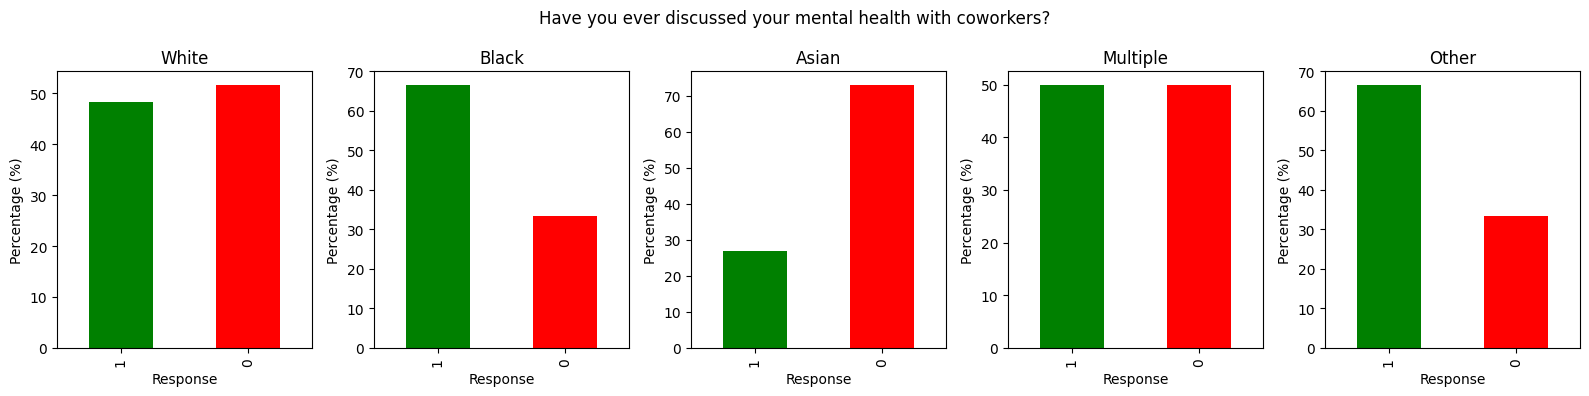

In [ ]:
df_white = df.loc[df[89].eq('White')]
df_black = df.loc[df[89].eq('Black')]
df_asian = df.loc[df[89].eq('Asian')]
df_multiple = df.loc[df[89].eq('Multiple')]
df_other_race = df.loc[df[89].eq('Other')]
white_60 = df_white.loc[df_white[60] != '-1'][60].value_counts()
black_60 = df_black.loc[df_black[60] != '-1'][60].value_counts()
asian_60 = df_asian.loc[df_asian[60] != '-1'][60].value_counts()
multiple_60 = df_multiple.loc[df_multiple[60] != '-1'][60].value_counts()
other_races_60 = df_other_race.loc[df_other_race[60] != '-1'][60].value_counts()
total_white = white_60.sum()
white_60 = white_60 / total_white * 100
total_black = black_60.sum()
black_60 = black_60 / total_black * 100
total_asian = asian_60.sum()
asian_60 = asian_60 / total_asian * 100
total_multiple = multiple_60.sum()
multiple_60 = multiple_60 / total_multiple * 100
total_other = other_races_60.sum()
other_races_60 = other_races_60 / total_other * 100
order = ['1', '0']
white_60 = white_60.reindex(order)
black_60 = black_60.reindex(order)
asian_60 = asian_60.reindex(order)
multiple_60 = multiple_60.reindex(order)
other_races_60 = other_races_60.reindex(order)
colors = ['green', 'red']
fig, axs = plt.subplots(1, 5, figsize=(16, 4))

white_60.plot(kind='bar', ax=axs[0], color=colors)
axs[0].set_xlabel('Response')
axs[0].set_ylabel('Percentage (%)')
axs[0].set_title('White')

black_60.plot(kind='bar', ax=axs[1], color=colors)
axs[1].set_xlabel('Response')
axs[1].set_ylabel('Percentage (%)')
axs[1].set_title('Black')

asian_60.plot(kind='bar', ax=axs[2], color=colors)
axs[2].set_xlabel('Response')
axs[2].set_ylabel('Percentage (%)')
axs[2].set_title('Asian')

multiple_60.plot(kind='bar', ax=axs[3], color=colors)
axs[3].set_xlabel('Response')
axs[3].set_ylabel('Percentage (%)')
axs[3].set_title('Multiple')

other_races_60.plot(kind='bar', ax=axs[4], color=colors)
axs[4].set_xlabel('Response')
axs[4].set_ylabel('Percentage (%)')
axs[4].set_title('Other')

plt.suptitle('Have you ever discussed your mental health with coworkers?', fontsize=12)
plt.tight_layout()
plt.show()

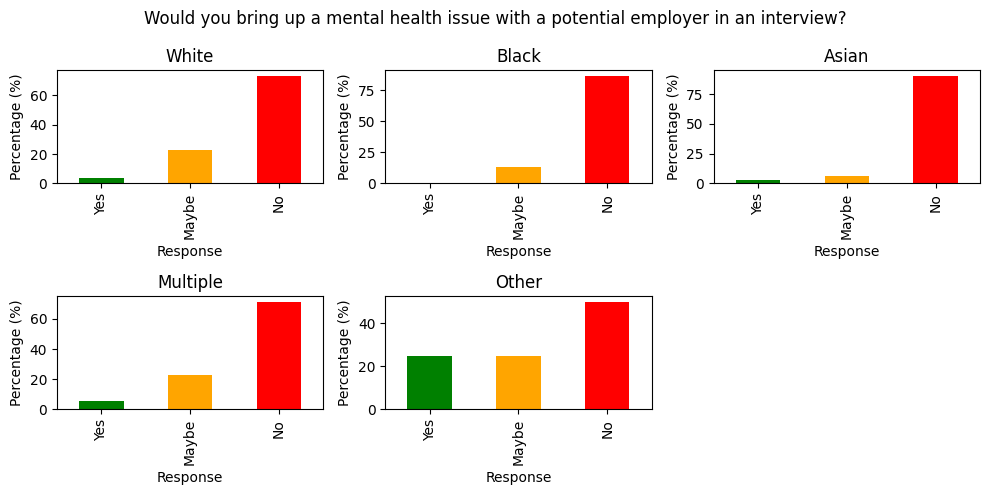

In [ ]:
df_white = df.loc[df[89].eq('White')]
df_black = df.loc[df[89].eq('Black')]
df_asian = df.loc[df[89].eq('Asian')]
df_multiple = df.loc[df[89].eq('Multiple')]
df_other_race = df.loc[df[89].eq('Other')]
white_12 = df_white.loc[df_white[12] != '-1'][12].value_counts()
black_12 = df_black.loc[df_black[12] != '-1'][12].value_counts()
asian_12 = df_asian.loc[df_asian[12] != '-1'][12].value_counts()
multiple_12 = df_multiple.loc[df_multiple[12] != '-1'][12].value_counts()
other_races_12 = df_other_race.loc[df_other_race[12] != '-1'][12].value_counts()
total_white = white_12.sum()
white_12 = white_12 / total_white * 100
total_black = black_12.sum()
black_12 = black_12 / total_black * 100
total_asian = asian_12.sum()
asian_12 = asian_12 / total_asian * 100
total_multiple = multiple_12.sum()
multiple_12 = multiple_12 / total_multiple * 100
total_other = other_races_12.sum()
other_races_12 = other_races_12 / total_other * 100
order = ['Yes', 'Maybe', 'No']
white_12 = white_12.reindex(order)
black_12 = black_12.reindex(order)
asian_12 = asian_12.reindex(order)
multiple_12 = multiple_12.reindex(order)
other_races_12 = other_races_12.reindex(order)
colors = ['green', 'orange', 'red']
fig, axs = plt.subplots(2, 3, figsize=(10, 5))

white_12.plot(kind='bar', ax=axs[0][0], color=colors)
axs[0][0].set_xlabel('Response')
axs[0][0].set_ylabel('Percentage (%)')
axs[0][0].set_title('White')

black_12.plot(kind='bar', ax=axs[0][1], color=colors)
axs[0][1].set_xlabel('Response')
axs[0][1].set_ylabel('Percentage (%)')
axs[0][1].set_title('Black')

asian_12.plot(kind='bar', ax=axs[0][2], color=colors)
axs[0][2].set_xlabel('Response')
axs[0][2].set_ylabel('Percentage (%)')
axs[0][2].set_title('Asian')

multiple_12.plot(kind='bar', ax=axs[1][0], color=colors)
axs[1][0].set_xlabel('Response')
axs[1][0].set_ylabel('Percentage (%)')
axs[1][0].set_title('Multiple')

other_races_12.plot(kind='bar', ax=axs[1][1], color=colors)
axs[1][1].set_xlabel('Response')
axs[1][1].set_ylabel('Percentage (%)')
axs[1][1].set_title('Other')
axs[1][2].axis('off')

plt.suptitle('Would you bring up a mental health issue with a potential employer in an interview?', fontsize=12)
plt.tight_layout()
plt.show()

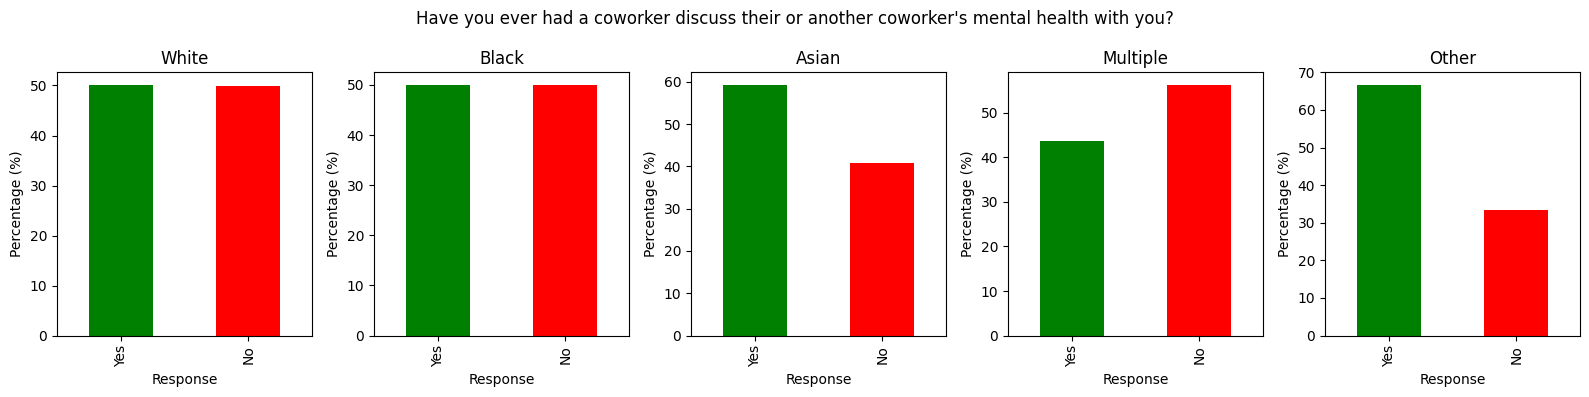

In [ ]:
df_white = df.loc[df[89].eq('White')]
df_black = df.loc[df[89].eq('Black')]
df_asian = df.loc[df[89].eq('Asian')]
df_multiple = df.loc[df[89].eq('Multiple')]
df_other_race = df.loc[df[89].eq('Other')]
white_62 = df_white.loc[df_white[62] != '-1'][62].value_counts()
black_62 = df_black.loc[df_black[62] != '-1'][62].value_counts()
asian_62 = df_asian.loc[df_asian[62] != '-1'][62].value_counts()
multiple_62 = df_multiple.loc[df_multiple[62] != '-1'][62].value_counts()
other_races_62 = df_other_race.loc[df_other_race[62] != '-1'][62].value_counts()
total_white = white_62.sum()
white_62 = white_62 / total_white * 100
total_black = black_62.sum()
black_62 = black_62 / total_black * 100
total_asian = asian_62.sum()
asian_62 = asian_62 / total_asian * 100
total_multiple = multiple_62.sum()
multiple_62 = multiple_62 / total_multiple * 100
total_other = other_races_62.sum()
other_races_62 = other_races_62 / total_other * 100
mapping = {'1': 'Yes', '0': 'No'}
white_62.index = white_62.index.map(mapping)
black_62.index = black_62.index.map(mapping)
asian_62.index = asian_62.index.map(mapping)
multiple_62.index = multiple_62.index.map(mapping)
other_races_62.index = other_races_62.index.map(mapping)
order = ['Yes', 'No']
white_62 = white_62.reindex(order)
black_62 = black_62.reindex(order)
asian_62 = asian_62.reindex(order)
multiple_62 = multiple_62.reindex(order)
other_races_62 = other_races_62.reindex(order)
colors = ['green', 'red']
fig, axs = plt.subplots(1, 5, figsize=(16, 4))

white_62.plot(kind='bar', ax=axs[0], color=colors)
axs[0].set_xlabel('Response')
axs[0].set_ylabel('Percentage (%)')
axs[0].set_title('White')

black_62.plot(kind='bar', ax=axs[1], color=colors)
axs[1].set_xlabel('Response')
axs[1].set_ylabel('Percentage (%)')
axs[1].set_title('Black')

asian_62.plot(kind='bar', ax=axs[2], color=colors)
axs[2].set_xlabel('Response')
axs[2].set_ylabel('Percentage (%)')
axs[2].set_title('Asian')

multiple_62.plot(kind='bar', ax=axs[3], color=colors)
axs[3].set_xlabel('Response')
axs[3].set_ylabel('Percentage (%)')
axs[3].set_title('Multiple')

other_races_62.plot(kind='bar', ax=axs[4], color=colors)
axs[4].set_xlabel('Response')
axs[4].set_ylabel('Percentage (%)')
axs[4].set_title('Other')

plt.suptitle('Have you ever had a coworker discuss their or another coworker\'s mental health with you?', fontsize=12)
plt.tight_layout()
plt.show()

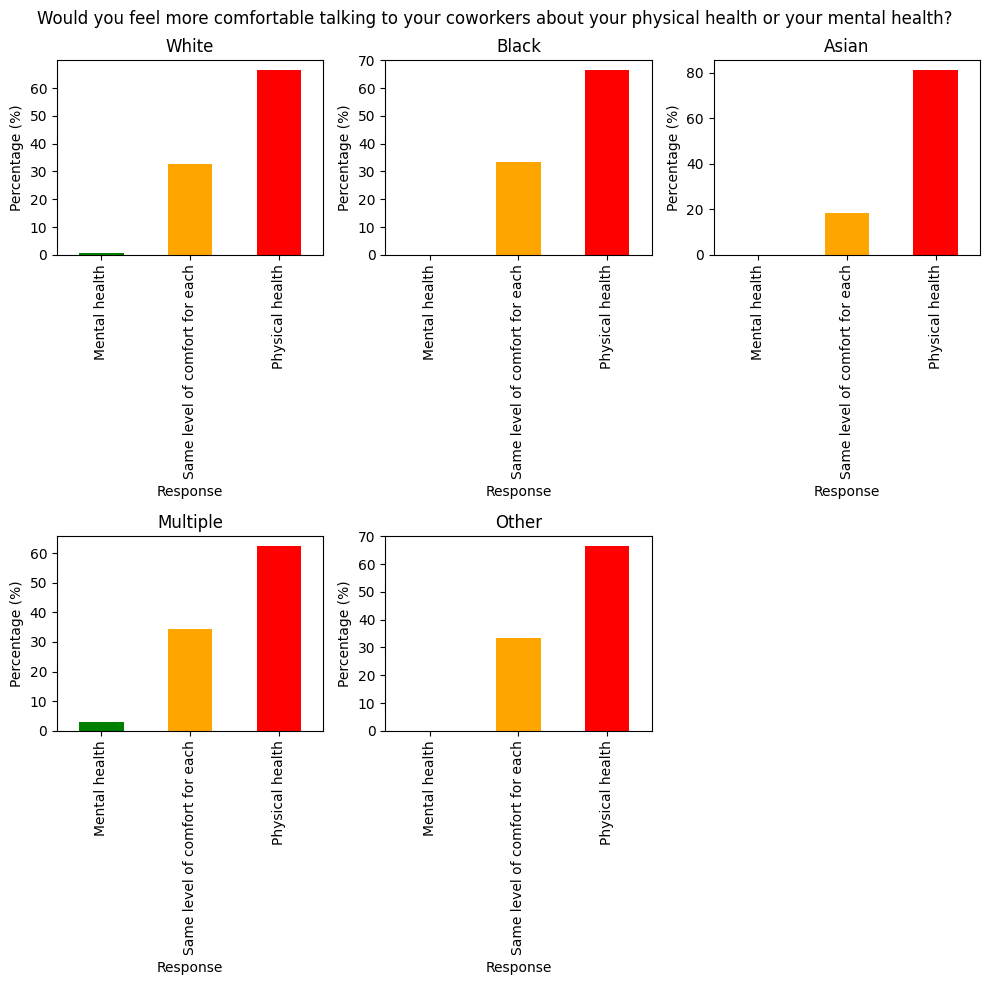

In [ ]:
df_white = df.loc[df[89].eq('White')]
df_black = df.loc[df[89].eq('Black')]
df_asian = df.loc[df[89].eq('Asian')]
df_multiple = df.loc[df[89].eq('Multiple')]
df_other_race = df.loc[df[89].eq('Other')]
white_57 = df_white.loc[df_white[57] != '-1'][57].value_counts()
black_57 = df_black.loc[df_black[57] != '-1'][57].value_counts()
asian_57 = df_asian.loc[df_asian[57] != '-1'][57].value_counts()
multiple_57 = df_multiple.loc[df_multiple[57] != '-1'][57].value_counts()
other_races_57 = df_other_race.loc[df_other_race[57] != '-1'][57].value_counts()
total_white = white_57.sum()
white_57 = white_57 / total_white * 100
total_black = black_57.sum()
black_57 = black_57 / total_black * 100
total_asian = asian_57.sum()
asian_57 = asian_57 / total_asian * 100
total_multiple = multiple_57.sum()
multiple_57 = multiple_57 / total_multiple * 100
total_other = other_races_57.sum()
other_races_57 = other_races_57 / total_other * 100
order = ['Mental health', 'Same level of comfort for each', 'Physical health']
white_57 = white_57.reindex(order)
black_57 = black_57.reindex(order)
asian_57 = asian_57.reindex(order)
multiple_57 = multiple_57.reindex(order)
other_races_57 = other_races_57.reindex(order)
colors = ['green', 'orange', 'red']
fig, axs = plt.subplots(2, 3, figsize=(10, 10))

white_57.plot(kind='bar', ax=axs[0][0], color=colors)
axs[0][0].set_xlabel('Response')
axs[0][0].set_ylabel('Percentage (%)')
axs[0][0].set_title('White')

black_57.plot(kind='bar', ax=axs[0][1], color=colors)
axs[0][1].set_xlabel('Response')
axs[0][1].set_ylabel('Percentage (%)')
axs[0][1].set_title('Black')

asian_57.plot(kind='bar', ax=axs[0][2], color=colors)
axs[0][2].set_xlabel('Response')
axs[0][2].set_ylabel('Percentage (%)')
axs[0][2].set_title('Asian')

multiple_57.plot(kind='bar', ax=axs[1][0], color=colors)
axs[1][0].set_xlabel('Response')
axs[1][0].set_ylabel('Percentage (%)')
axs[1][0].set_title('Multiple')

other_races_57.plot(kind='bar', ax=axs[1][1], color=colors)
axs[1][1].set_xlabel('Response')
axs[1][1].set_ylabel('Percentage (%)')
axs[1][1].set_title('Other')
axs[1][2].axis('off')

plt.suptitle('Would you feel more comfortable talking to your coworkers about your physical health or your mental health?', fontsize=12)
plt.tight_layout()
plt.show()